<a href="https://colab.research.google.com/github/harshithach999/Survival_Analysis_Breast_Cancer/blob/main/Breast_Cancer_Survival_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
gunesevitan_breast_cancer_metabric_path = kagglehub.dataset_download('gunesevitan/breast-cancer-metabric')

print('Data source import complete.')


Data source import complete.


# 1. Introduction

This project focuses on the comprehensive survival analysis of breast cancer patients, utilizing a combination of classical statistical methods and machine learning techniques to identify key prognostic factors influencing relapse-free survival (RFS), overall survival (OS) and Disease-Specific Surviva (DSS). By leveraging clinical and molecular data—including tumor size, tumor laterality, inferred menopausal state and so on—we applied Kaplan-Meier survival curves, Cox proportional hazards models with adjustments for non-proportional hazards, and Random Survival Forest models to capture both linear and complex nonlinear relationships. This integrative approach not only enhanced the predictive accuracy of patient outcomes but also provided clinically meaningful insights into risk stratification, highlighting the importance of variables such as positive lymph nodes and tumor size. The project demonstrates a rigorous workflow from data preprocessing and assumption testing to advanced modeling and interpretation, facilitating improved understanding of breast cancer prognosis and potential personalized treatment strategies.

In [2]:
!pip uninstall -y scikit-learn imbalanced-learn
!pip uninstall -y cesium
!pip install scikit-learn==1.3.2

!pip install imbalanced-learn==0.11.0
!pip install scikit-survival==0.22.2
!pip install lifelines

Found existing installation: scikit-learn 1.3.2
Uninstalling scikit-learn-1.3.2:
  Successfully uninstalled scikit-learn-1.3.2
Found existing installation: imbalanced-learn 0.11.0
Uninstalling imbalanced-learn-0.11.0:
  Successfully uninstalled imbalanced-learn-0.11.0
  Using cached scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.3.2 which is incompatible.
cuml-cu12 25.6.0 requires scikit-learn>=1.5, but you have scikit-learn 1.3.2 which is incompatible.
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl.metadata (8.3 kB)
Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)
  

# 2 Data Description

We derived the dataset ‘Breast Cancer METABRIC.csv’ from Kaggle.com, and its link is https://www.kaggle.com/datasets/gunesevitan/breast-cancer-metabric.<br>The dataset consists of 2509 rows and 34 columns.

## 2.1 Dataset Attributes
The dataset includes the following columns:
Common columns:<br>**Patient ID:** Unique patient identifier. (Categorical variable)<br>**Age at Diagnosis:** Age of the patients when they were first diagnosed with breast cancer. (Numerical variable)
<br>**Type of Breast Surgery:** Type of the breast surgery patient had undergone. (Categorical variable)
<br>**Cancer Type:** Type of the cancer. (Categorical variable)
<br>**Cancer Type Detailed:** Histological subtype of the cancer. (Categorical variable)
<br>**Cellularity:** The proportion of cancer within the residual tumor bed. (Categorical variable)
<br>**Chemotherapy:** Patient took chemotherapy or not. (Categorical variable)
<br>**Pam50 + Claudin-low subtype:** Classification based on the PAM50 gene signature and Claudin-low subtype, providing insight into the molecular characteristics of the tumor. (Categorical variable)
<br>**Cohort:** The specific group or population of patients included in the study, often categorized by shared characteristics or treatment protocols. (Numerical variable)
<br>**ER Status measured by IHC:** Status of estrogen receptor expression in the tumor, measured by immunohistochemistry (IHC). (Categorical variable)
<br>**ER Status:** whether the tumor is positive or negative for estrogen receptors. (Categorical variable)
<br>**Neoplasm Histologic Grade:** The grade of the cancer based on how abnormal the cancer cells appear under a microscope, which can indicate the aggressiveness of the tumor. (Numerical variable)
<br>**HER2 status measured by SNP6:** HER2 receptor status measured using SNP6 technology to detect gene amplification or overexpression. (Categorical variable)
<br>**HER2 Status:** whether HER2 receptors are overexpressed in the tumor, categorized as positive or negative. (Categorical variable)
<br>**Tumor Other Histologic Subtype:** Additional classification of the tumor based on other observed histological features. (Categorical variable)
Hormone Therapy: Whether the patient received hormone therapy. (Categorical variable)
<br>**Inferred Menopausal State:** The menopausal status of the patient inferred from clinical data. (Categorical variable)
<br>**Integrative Cluster:** Classification of tumors based on integrative analysis combining various data types, reflecting the tumor’s biological characteristics. (Categorical variable)  <br>**Primary Tumor Laterality:** Indicates the side of the body where the primary tumor is located, either left or right breast. (Categorical variable)  <br>**Lymph nodes examined positive:** The number of lymph nodes that tested positive for cancer cells. (Numerical variable)
<br>**Mutation Count:** The total number of genetic mutations identified in the tumor. (Numerical variable)
<br>**Nottingham prognostic index:** A scoring system that assesses the prognosis of breast cancer based on tumor histology and other factors. (Numerical variable)
<br>**Oncotree Code:** A standardized code used to classify tumor types according to the Oncotree classification system. (Categorical variable)
<br>**PR Status:** Status of progesterone receptors in the tumor, categorized as positive or negative. (Categorical variable)
<br>**Radio Therapy:** Whether the patient received radiation therapy. (Categorical variable)
<br>**Sex:** The gender of the patient. (Categorical variable)
<br>**3-Gene classifier subtype:** Classification based on the expression levels of three specific genes, providing a subtype classification for the tumor. (Categorical variable)
<br>**Tumor Size:** The size of the tumor, typically measured in centimeters. (Numerical variable)
<br>**Tumor Stage:** The stage of the tumor indicating the extent of cancer spread within the body. (Numerical variable)

Durations and events:
<br>**Patient's Vital Status:** The current health status of the patient, indicating whether they are alive or deceased. (Categorical variable)
<br>**Relapse Free Status (Months):** The number of months a patient remained free from cancer recurrence after initial treatment. (Numerical variable)
<br>**Relapse Free Status:** Indicates whether the patient experienced a relapse or remained free of cancer recurrence. (Categorical variable)
<br>**Overall Survival (Months):** The total number of months a patient survived following their breast cancer diagnosis. (Numerical variable)
<br>**Overall Survival Status:** Whether the patient is alive or deceased at the time of follow-up. (Categorical variable)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid
from scipy.stats import chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import concordance_index_censored
from sksurv.util import Surv
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from lifelines.statistics import proportional_hazard_test

from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
import xgboost as xgb
from sklearn.metrics import make_scorer, f1_score, recall_score,precision_score
from sklearn.metrics import mean_squared_error,r2_score,classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from lifelines.statistics import multivariate_logrank_test
from lifelines.utils import concordance_index,k_fold_cross_validation

from lifelines.statistics import multivariate_logrank_test
from tqdm import tqdm
from sklearn.base import clone

In [4]:
df_metabric = pd.read_csv(r'/kaggle/input/breast-cancer-metabric/Breast Cancer METABRIC.csv')
print('Dataset Shape:', df_metabric.shape, sep='\n')
print('........................')
print('Column Types:', df_metabric.dtypes, sep='\n')
print('........................')
# Check for missing values
print('Data columns with null values:', df_metabric.isnull().sum(), sep='\n')

Dataset Shape:
(2509, 34)
........................
Column Types:
Patient ID                         object
Age at Diagnosis                  float64
Type of Breast Surgery             object
Cancer Type                        object
Cancer Type Detailed               object
Cellularity                        object
Chemotherapy                       object
Pam50 + Claudin-low subtype        object
Cohort                            float64
ER status measured by IHC          object
ER Status                          object
Neoplasm Histologic Grade         float64
HER2 status measured by SNP6       object
HER2 Status                        object
Tumor Other Histologic Subtype     object
Hormone Therapy                    object
Inferred Menopausal State          object
Integrative Cluster                object
Primary Tumor Laterality           object
Lymph nodes examined positive     float64
Mutation Count                    float64
Nottingham prognostic index       float64
Oncotree Co

In [5]:
df_metabric['3-Gene classifier subtype'].unique()

array(['ER-/HER2-', 'ER+/HER2- High Prolif', nan, 'ER+/HER2- Low Prolif',
       'HER2+'], dtype=object)

Since the original categories in the '3-Gene classifier subtype' column do not conform to the standard three-gene classification system, and the classes “ER+/HER2- High Prolif” and “ER+/HER2- Low Prolif” contain proliferation status information, we can first extract the proliferation status into a separate column. Then, based on the clear expression statuses of “ER Status,” “PR,” and “HER2+,” we can reassign the '3-Gene classifier subtype' values in a biologically meaningful and clinically relevant way, improving the accuracy and analytical value of the data.

In [6]:
df= df_metabric.copy()

df['Prolif']= df['3-Gene classifier subtype'].replace({
    'ER+/HER2- High Prolif':'High',
    'ER+/HER2- Low Prolif': 'Low'
})

In [7]:
#Assign 3-Gene classifier subtype based on ER Status and HER2 Status
def classify_subtype(row):
    ER = row['ER Status']
    HER2 = row['HER2 Status']
    PR= row['PR Status']
    Prolif= row['Prolif']

    if ER== 'Positive' and PR== 'Positive' and HER2== 'Negative' and Prolif== 'Low':
        return 'Luminal A'
    elif ER== 'Positive' and PR== 'Positive' and HER2== 'Negative' and Prolif== 'High':
        return 'Luminal B'
    elif ER== 'Positive' and PR== 'Positive' and HER2== 'Positive':
        return 'Luminal B'
    elif ER== 'Negative' and PR== 'Negative' and HER2== 'Positive':
        return 'HER2-enriched'
    elif ER== 'Negative' and PR== 'Negative' and HER2== 'Negative':
        return 'TNBC'
    else:
        return np.nan

In [8]:
df['3-Gene classifier subtype'] = df.apply(classify_subtype, axis=1)
df_metabric['3-Gene classifier subtype']= df['3-Gene classifier subtype'].copy()

# 3 Exploratory Data Analysis

## 3.1 Removing Unecessary Columns

In [9]:
df_metabric['Sex'].unique()

array(['Female'], dtype=object)

The 'Sex' column contains only the value 'Female', it does not provide anyt variability and can therefore be removed from the dataset.

'Tumor Other Histologic Subtype' refers to the specific histologic subtype name of the tumor, while 'Oncotree Code' is a standardized tumor type code. Mutiple 'Tumor Other Histologic Subtype' entires may correspond to the same 'Oncotree Code', indicating a many-to-one relationship.

In [10]:
#Check unique corespondance from Tumor Other Histologic Subtype to Oncotree Code
print(df_metabric.groupby('Tumor Other Histologic Subtype')['Oncotree Code'].nunique())
print(".............................................")
#Check the reverse mapping
print(df_metabric.groupby('Oncotree Code')['Tumor Other Histologic Subtype'].nunique())
print(".............................................")
print(df_metabric.groupby('Oncotree Code')['Tumor Other Histologic Subtype'].unique())

Tumor Other Histologic Subtype
Ductal/NST             1
Lobular                1
Medullary              1
Metaplastic            1
Mixed                  1
Mucinous               1
Other                  1
Tubular/ cribriform    1
Name: Oncotree Code, dtype: int64
.............................................
Oncotree Code
BRCA      0
BREAST    1
IDC       3
ILC       1
IMMC      1
MBC       1
MDLC      1
PBS       0
Name: Tumor Other Histologic Subtype, dtype: int64
.............................................
Oncotree Code
BRCA                                             [nan]
BREAST                                         [Other]
IDC       [Ductal/NST, Tubular/ cribriform, Medullary]
ILC                                          [Lobular]
IMMC                                        [Mucinous]
MBC                                      [Metaplastic]
MDLC                                           [Mixed]
PBS                                              [nan]
Name: Tumor Other Histologic

Upon check, we found that the relationship between 'Tumor Other Histologic Subtype' and 'Oncotree Code' in the dataset is indeed many-to-one. Specifically, the Oncotree Code "IDC" corresponds to three different histologic subtypes, while each of the other Oncotree Codes corresponds to a unique Tumor Other Histologic Subtype. Additionally, we observed that the missing values in 'Tumor Other Histologic Subtype' can be inferred from their corresponding 'Oncotree Code'.

In [11]:
# Get the row indices where 'Tumor Other Histologic Subtype' is missing
missing_idx = df_metabric[df_metabric['Tumor Other Histologic Subtype'].isna()].index

# Fill the missing 'Tumor Other Histologic Subtype' values with the corresponding 'Oncotree Code' values
df_metabric.loc[missing_idx, 'Tumor Other Histologic Subtype'] = df_metabric.loc[missing_idx, 'Oncotree Code']

Since these two columns contain redundant information, we decided to refine the classification and improve data completeness by replacing "IDC" with its three corresponding subtypes, and subsequently removed the 'Tumor Other Histologic Subtype' column from the dataset.

In [12]:
# Check the mapping relationship between Oncotree Code and Cancer Type Detailed
print (df_metabric.groupby('Oncotree Code')['Cancer Type Detailed'].nunique())
print(".............................................")
print (df_metabric.groupby('Cancer Type Detailed')['Oncotree Code'].nunique())

Oncotree Code
BRCA      1
BREAST    1
IDC       1
ILC       1
IMMC      1
MBC       1
MDLC      1
PBS       1
Name: Cancer Type Detailed, dtype: int64
.............................................
Cancer Type Detailed
Breast                                       1
Breast Angiosarcoma                          1
Breast Invasive Ductal Carcinoma             1
Breast Invasive Lobular Carcinoma            1
Breast Invasive Mixed Mucinous Carcinoma     1
Breast Mixed Ductal and Lobular Carcinoma    1
Invasive Breast Carcinoma                    1
Metaplastic Breast Cancer                    1
Name: Oncotree Code, dtype: int64


We observed a one-to-one relationship between 'Oncotree Code' and 'Cancer Type Detailed'. As a result, 'Cancer Type detailed' is also considered redundant, since we decided to retain 'Oncotree Code' for further analysis.

In [13]:
df_metabric2 = df_metabric.drop(columns=['Patient ID', 'ER status measured by IHC',
                                        'HER2 status measured by SNP6','Sex',
                                         'Cancer Type Detailed',
                                         'Tumor Other Histologic Subtype'])

The columns 'Patient ID', 'ER status measured by IHC', 'HER2 status measured by SNP6', and 'Cohort' were removed from the METABRIC dataset for the following reasons:

Patient ID: This column serves as a unique identifier for each patient and does not contain predictive information relevant to modeling outcomes. Including such identifiers can introduce noise or lead to overfitting in machine learning models.

ER status measured by IHC and HER2 status measured by SNP6: These columns represent specific measurement methods for determining ER and HER2 statuses. However, the dataset also includes more generalized 'ER Status' and 'HER2 Status' columns, which consolidate information across different measurement techniques. Retaining only the generalized columns helps reduce redundancy and potential inconsistencies arising from varying measurement methods.

## 3.2 Data Distribution

/tmp/ipython-input-3874793502.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Inferred Menopausal State', y='Age at Diagnosis', data=plot_df, palette='Set3', ax=axs[1, 0])


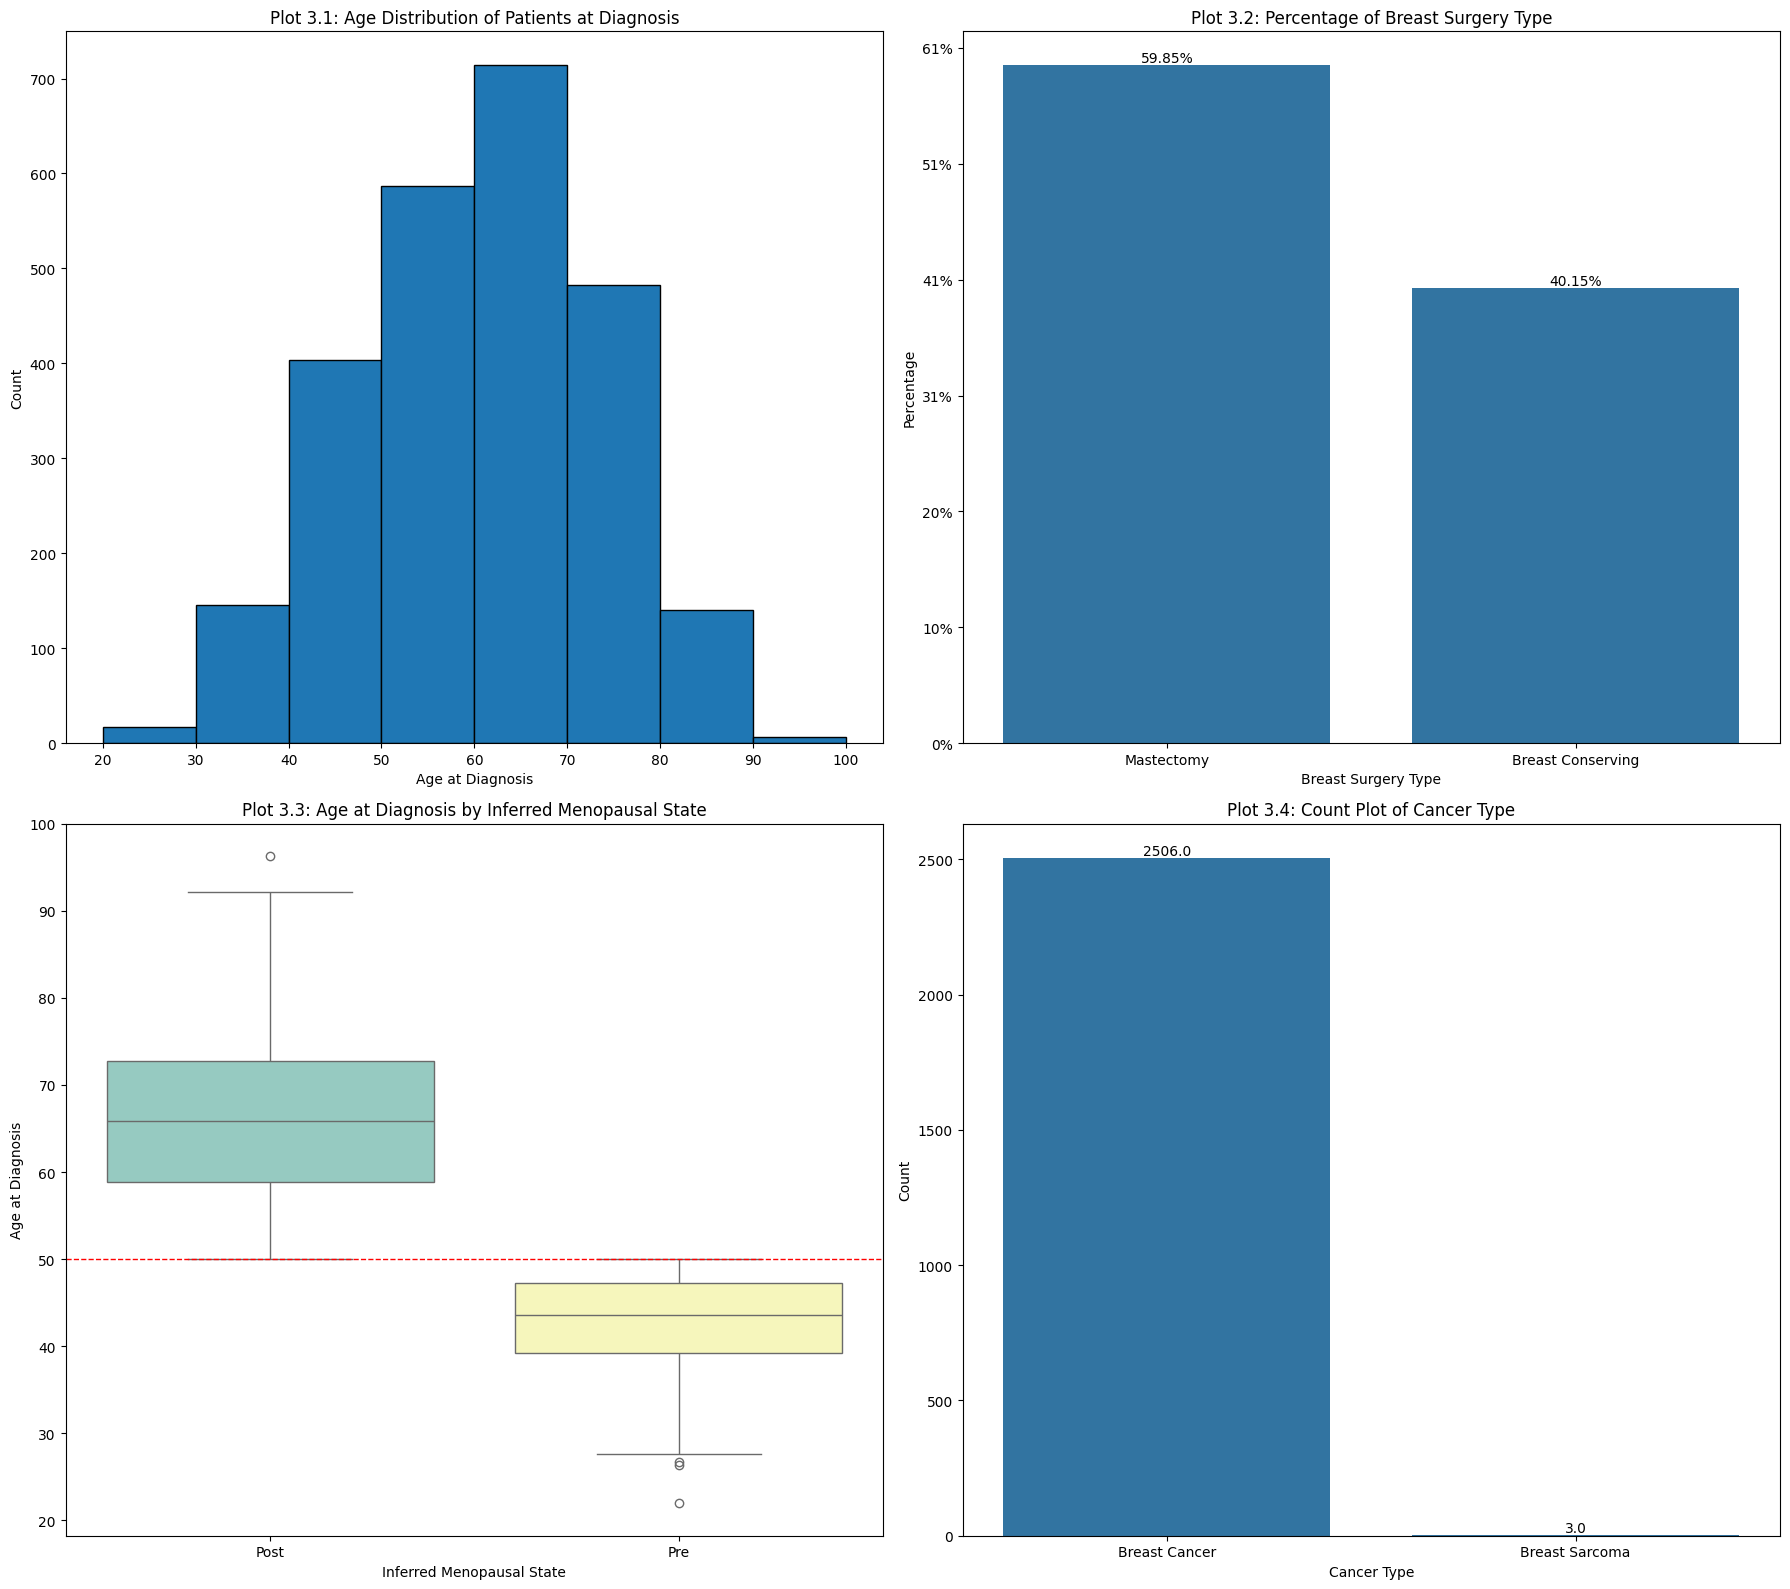

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(18, 16))

# Plot 3.1：Age distribution histogram
age = df_metabric2['Age at Diagnosis']
bins = np.arange(20, 110, 10)
axs[0, 0].hist(age.dropna(), bins=bins, edgecolor='black')
axs[0, 0].set_title('Plot 3.1: Age Distribution of Patients at Diagnosis')
axs[0, 0].set_xlabel('Age at Diagnosis')
axs[0, 0].set_ylabel('Count')

# Plot 3.2：Percentage of Breast Surgery Type (countplot + percentage)
df_bst= df_metabric2.dropna(subset='Type of Breast Surgery')
total = len(df_bst)
sns.countplot(x='Type of Breast Surgery', data=df_bst, ax=axs[0, 1])
axs[0, 1].yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0f}%'.format(100 * y / total)))

for p in axs[0, 1].patches:
    height = p.get_height()
    axs[0, 1].text(p.get_x() + p.get_width() / 2., height, f'{100 * height / total:.2f}%',
                   ha='center', va='bottom')

axs[0, 1].set_title('Plot 3.2: Percentage of Breast Surgery Type')
axs[0, 1].set_xlabel('Breast Surgery Type')
axs[0, 1].set_ylabel('Percentage')

# Plot 3.3：Boxplot - Age at Diagnosis by Inferred Menopausal State
plot_df = df_metabric2[['Inferred Menopausal State', 'Age at Diagnosis']].dropna()
sns.boxplot(x='Inferred Menopausal State', y='Age at Diagnosis', data=plot_df, palette='Set3', ax=axs[1, 0])
axs[1, 0].axhline(y=50, linestyle='--', color='red', linewidth=1)
axs[1, 0].set_title('Plot 3.3: Age at Diagnosis by Inferred Menopausal State')
axs[1, 0].set_xlabel('Inferred Menopausal State')
axs[1, 0].set_ylabel('Age at Diagnosis')

# Plot 3.4：Count plot of Cancer Type
sns.countplot(x='Cancer Type', data=df_metabric2, ax=axs[1, 1])
for p in axs[1, 1].patches:
    height = p.get_height()
    axs[1, 1].text(p.get_x() + p.get_width() / 2., height, f'{height}',
                   ha='center', va='bottom')

axs[1, 1].set_title('Plot 3.4: Count Plot of Cancer Type')
axs[1, 1].set_xlabel('Cancer Type')
axs[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

**Plot 3.1:** Breast cancer can occur in women at any age starting from 20. Notably, the incidence is higher among women over 40.

**Plot 3.2:** The "Breast Surgery Type" column includes two types: mastectomy and breast conserving surgery. The proportions of these two types are not vastly different, indicating that both surgeries are commonly used in clinical practice. Specifically, mastectomy accounts for 59.85%, while breast-conserving surgery accounts for 40.15%.

**Plot 3.3:** The inferred menopausal state is directly related to age—women above 50 are classified as postmenopausal, while those below 50 are premenopausal.

**Plot 3.4:**  There are two types of cancer: breast cancer and breast sarcoma. The vast majority of patients have breast cancer, while breast sarcoma is extremely rare, with only 3 cases out of 2,509.Therefore, this feature is of limited significance and can be removed.

In [15]:
df_metabric2= df_metabric2.drop(columns=['Cancer Type'])

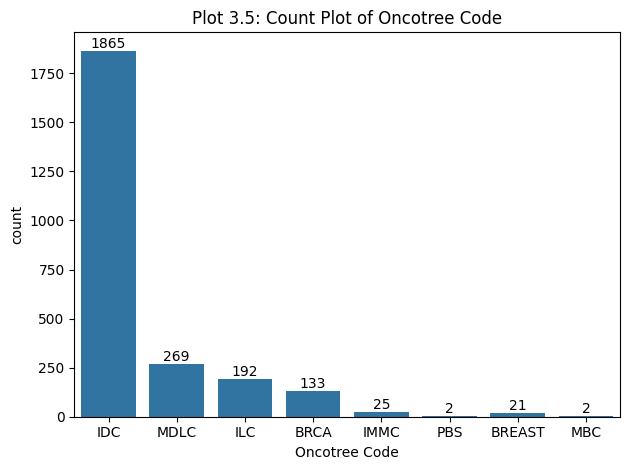

In [16]:
# Plot 3.5: Create the Oncotree Code count plot
ax = sns.countplot(x='Oncotree Code', data=df_metabric2)

# Annotate bars using bar_label
ax.bar_label(ax.containers[0])
ax.set_title('Plot 3.5: Count Plot of Oncotree Code')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

From this plot we found that the ‘Oncotree Code’ variable had highly imbalanced category distribution, with categories IMMC, PBS, BREASR and MBC having very few samples. To address this sparsity and ensure futher model's stability, we decide to merge these infrequent categories into a single group.

In [17]:
# Merge rare categories into a single "Other" category
# Define the main categories to keep separate
main_classes = ['IDC', 'MDLC', 'ILC', 'BRCA']

# Define a function to merge less frequent categories into "Other"
def merge_classes(x):
    if x in main_classes:
        return x
    else:
        return 'Other'  # Represent "Other" category as -1

# Apply the merging function to create a new column with merged categories
df_metabric2['Oncotree Code_merged'] = df_metabric2['Oncotree Code'].apply(merge_classes)
df_metabric2= df_metabric2.drop(columns=['Oncotree Code'])
# Check the distribution of merged categories
print(df_metabric2['Oncotree Code_merged'].value_counts())

Oncotree Code_merged
IDC      1865
MDLC      269
ILC       192
BRCA      133
Other      50
Name: count, dtype: int64


/tmp/ipython-input-1288743802.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Relapse Free Status', data=df_Relapse,
/tmp/ipython-input-1288743802.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Overall Survival Status',  data=df_overall,


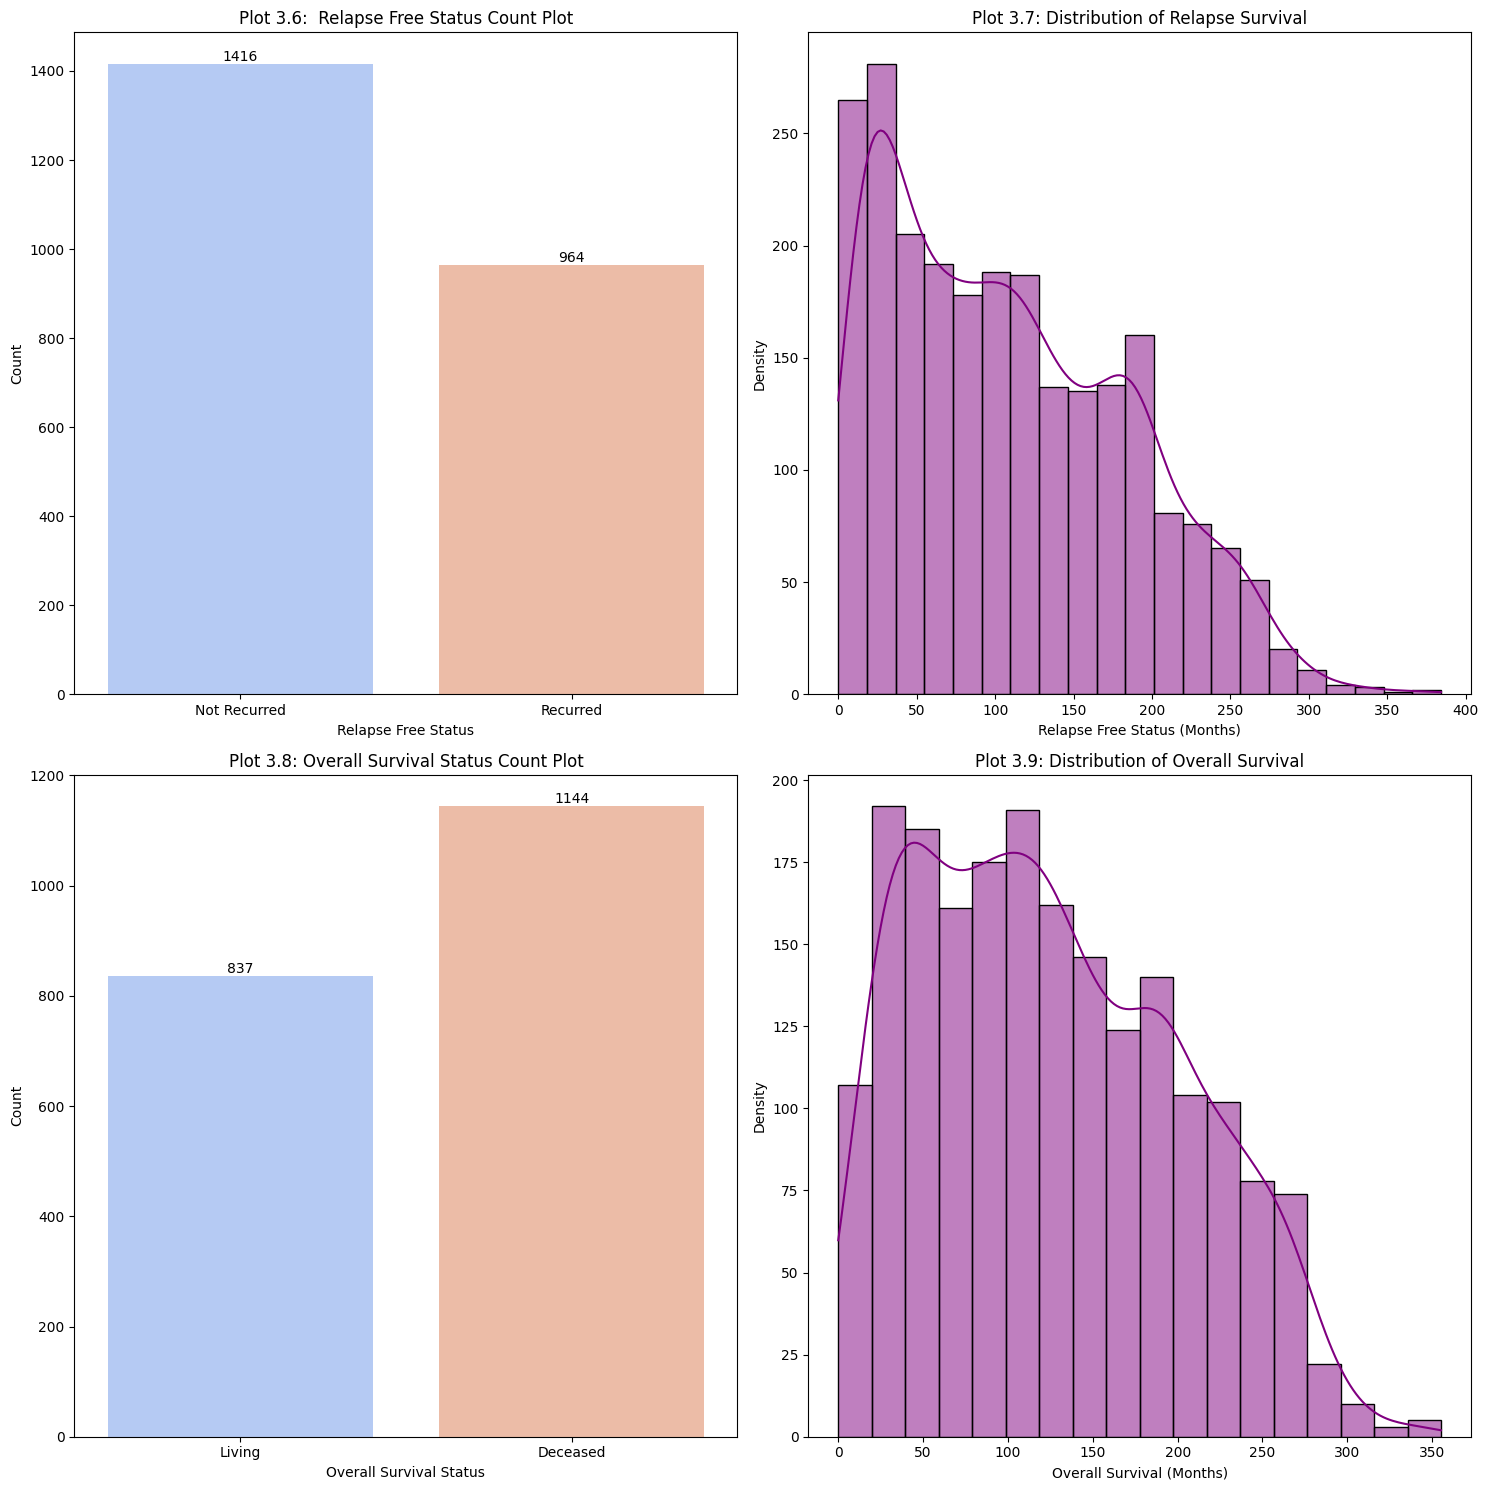

In [18]:
df_Relapse = df_metabric2[['Relapse Free Status (Months)', 'Relapse Free Status']].dropna()
df_overall = df_metabric2[['Overall Survival Status', 'Overall Survival (Months)']].dropna()

fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs = axs.flatten()

# Plot 3.6: Relapse Free Status count plot
sns.countplot(x='Relapse Free Status', data=df_Relapse,
              palette='coolwarm', ax=axs[0])

for p in axs[0].patches:
    height = int(p.get_height())
    axs[0].text(p.get_x() + p.get_width() / 2., height, f'{height}',
                ha='center', va='bottom')

axs[0].set_title('Plot 3.6:  Relapse Free Status Count Plot')
axs[0].set_xlabel('Relapse Free Status')
axs[0].set_ylabel('Count')

# Plot 3.7: Relapse Free Status (Months) histogram
sns.histplot(df_Relapse['Relapse Free Status (Months)'], kde=True, ax=axs[1], color='purple')
axs[1].set_title('Plot 3.7: Distribution of Relapse Survival')
axs[1].set_xlabel('Relapse Free Status (Months)')
axs[1].set_ylabel('Density')


# Plot 3.8: Overall Survival Status count plot
sns.countplot(x='Overall Survival Status',  data=df_overall,
              palette='coolwarm', ax=axs[2])


for p in axs[2].patches:
    height = int(p.get_height())
    axs[2].text(p.get_x() + p.get_width() / 2., height, f'{height}',
                ha='center', va='bottom')

axs[2].set_title('Plot 3.8: Overall Survival Status Count Plot')
axs[2].set_xlabel('Overall Survival Status')
axs[2].set_ylabel('Count')

# Plot 3.9: Overall Survival (Months) histogram
sns.histplot(df_overall['Overall Survival (Months)'], kde=True, ax=axs[3], color='purple')
axs[3].set_title('Plot 3.9: Distribution of Overall Survival')
axs[3].set_xlabel('Overall Survival (Months)')
axs[3].set_ylabel('Density')


plt.tight_layout()
plt.show()


**Plot 3.6:** A significant propotion(about 40%) experienced a recurrence, highlighting the importance of follow-up and predictive modeling for recureence.

**Plot 3.7:** Suggets recurrence risk is highest within the first 5-8 years post treatment.

**Plot 3.8:** More patients have passed away than are currently living.

**Plot 3.9:** There is a right-skewed distribution, showing a significant number of patiens survive 5-10 years, with fewer surviving longer.

## 3.3 Encoding Categorical Variables

In [19]:
from sklearn.preprocessing import LabelEncoder

common_cate = ['Type of Breast Surgery', 'Pam50 + Claudin-low subtype',
               'Integrative Cluster', '3-Gene classifier subtype',
               'Primary Tumor Laterality', 'Oncotree Code_merged']

encoders = {}

for col in common_cate:
    le = LabelEncoder()
    # Encode only non-null data
    mask = df_metabric2[col].notnull()
    df_metabric2.loc[mask, col] = le.fit_transform(df_metabric2.loc[mask, col])
    df_metabric2[col] = df_metabric2[col].astype('float64')
    encoders[col] = le

In [20]:
# Cellularity
df_metabric2['Cellularity'] = df_metabric2['Cellularity'].map({
    'High': 2, 'Moderate': 1, 'Low': 0
}).astype("Float64")

# Chemotherapy, Hormone Therapy, Radio Therapy
for col in ['Chemotherapy', 'Hormone Therapy', 'Radio Therapy']:
    df_metabric2[col] = df_metabric2[col].map({
        'Yes': 1, 'No': 0
    }).astype("Float64")

# ER, HER2, PR Status
for col in ['ER Status', 'HER2 Status', 'PR Status']:
    df_metabric2[col] = df_metabric2[col].map({
        'Positive': 1, 'Negative': 0
    }).astype("Float64")

#Inferred Menopausal State
df_metabric2['Inferred Menopausal State'] = df_metabric2['Inferred Menopausal State'].map({
    'Pre': 0, 'Post': 1}).astype("Float64")

## 3.4 Impute Missing Values by Exploring Relationships Among Independent Variables

In [21]:
df_metabric2.isnull().sum()

,0
Age at Diagnosis,11
Type of Breast Surgery,554
Cellularity,592
Chemotherapy,529
Pam50 + Claudin-low subtype,529
Cohort,11
ER Status,40
Neoplasm Histologic Grade,121
HER2 Status,529
Hormone Therapy,529


In the dataset, many columns have over 500 missing values. To address this, we chose to remove rows with missing values in the 'Chemotherapy' column, thereby eliminating a significant portion of the dataset's missing data.

In [22]:
# Remove rows with too many null values through removal of null values from Chemotherapy
df_metabric2.dropna(subset=['Chemotherapy'], inplace=True)
print('Data columns with null values:',  df_metabric2.isnull().sum(), sep='\n')

Data columns with null values:
Age at Diagnosis                   0
Type of Breast Surgery            25
Cellularity                       63
Chemotherapy                       0
Pam50 + Claudin-low subtype        0
Cohort                             0
ER Status                          0
Neoplasm Histologic Grade         88
HER2 Status                        0
Hormone Therapy                    0
Inferred Menopausal State          0
Integrative Cluster                0
Primary Tumor Laterality         110
Lymph nodes examined positive     76
Mutation Count                   121
Nottingham prognostic index        0
Overall Survival (Months)          0
Overall Survival Status            0
PR Status                          0
Radio Therapy                      0
Relapse Free Status (Months)       0
Relapse Free Status                1
3-Gene classifier subtype        622
Tumor Size                        26
Tumor Stage                      514
Patient's Vital Status             1
Oncotre

In [23]:
df_mount= df_metabric2.drop(columns=['Overall Survival (Months)',
                                     'Overall Survival Status',
                                     "Patient's Vital Status",
                                     'Relapse Free Status (Months)',
                                     'Relapse Free Status']).copy()

### 3.4.1 Imputing Missing Data in 'Neoplasm Histologic Grade'

In [24]:
#Define a feature importance function for classification
def RFC_feature_importance(df_import, target_col, i) :

    # Step 1: Remove the missing value rows of the target column
    df_clean = df_import.dropna(subset=[target_col]).copy()

    # Step 2: Split target column and independent features
    X = df_clean.drop(columns=[target_col])
    y = df_clean[target_col]

    # Step 4: Train a Random Forest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X, y)

    # Step 5: Get feature importance
    feature_importance = pd.Series(model.feature_importances_, index=X.columns)
    feature_importance = feature_importance.sort_values(ascending=False)

    # Visualization
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance.values, y=feature_importance.index, color='yellow')
    plt.title(f"Plot {i}: Feature Importances for Predicting '{target_col}'")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.show()


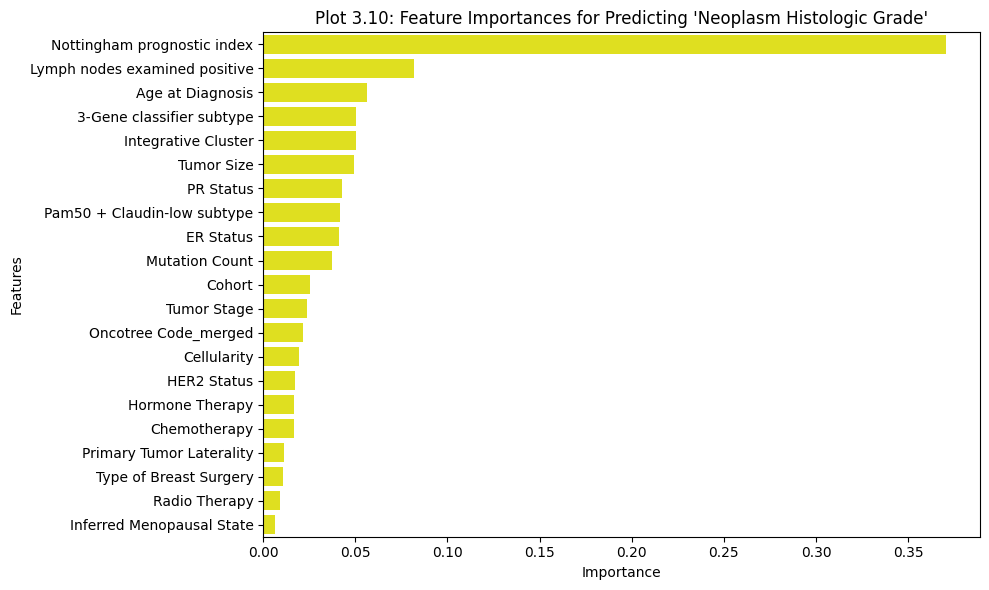

In [25]:
# Identify important features for predicting 'Neoplasm Histologic Grade'
RFC_feature_importance(df_import=df_mount.dropna().copy(), target_col='Neoplasm Histologic Grade', i= '3.10')

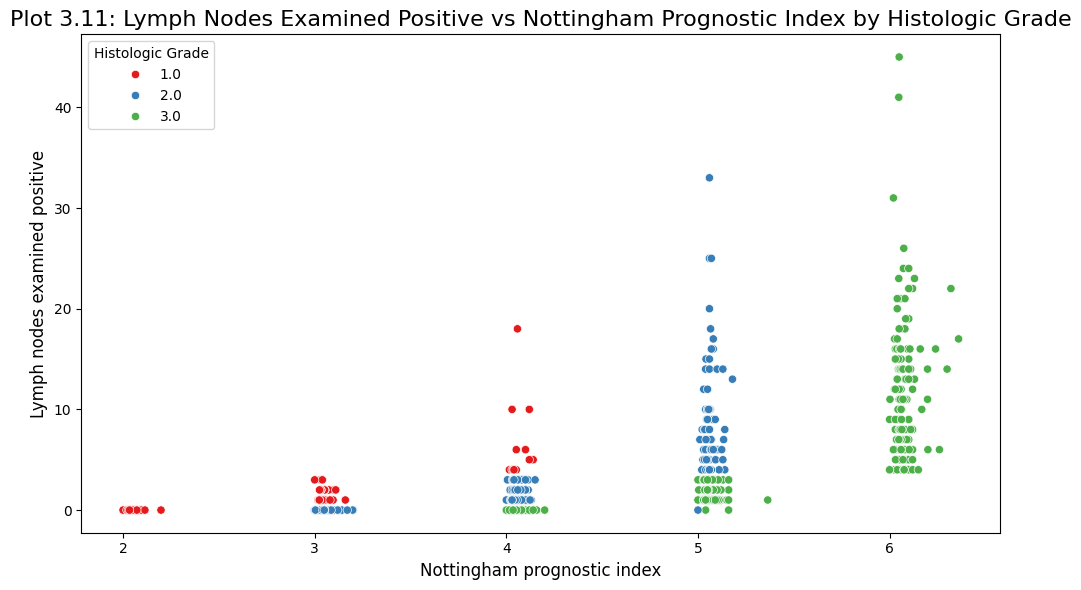

In [26]:
# Filter the dataset to include only top-ranked features
df_nn = df_mount[['Neoplasm Histologic Grade', 'Nottingham prognostic index','Lymph nodes examined positive' ]].dropna().copy()

#Create a scatterplot colored by Neoplasm Histologic Grade
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Nottingham prognostic index',
    y='Lymph nodes examined positive',
    hue='Neoplasm Histologic Grade',
    palette='Set1',
    data=df_nn
)

plt.title('Plot 3.11: Lymph Nodes Examined Positive vs Nottingham Prognostic Index by Histologic Grade', fontsize=16)
plt.xlabel('Nottingham prognostic index', fontsize=12)
plt.ylabel('Lymph nodes examined positive', fontsize=12)
plt.legend(title='Histologic Grade')
plt.tight_layout()
plt.show()

In [27]:
#Features and target
X = df_nn[['Nottingham prognostic index','Lymph nodes examined positive']]
y = df_nn['Neoplasm Histologic Grade']
# Train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Since the label values in the scatterplot are clearly separated, a simple decision tree can be built
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

#Predict label values
y_pred = clf.predict(X_test)

#Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.997275204359673
Confusion Matrix:
 [[ 26   0   0]
 [  0 149   1]
 [  0   0 191]]
Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        26
         2.0       1.00      0.99      1.00       150
         3.0       0.99      1.00      1.00       191

    accuracy                           1.00       367
   macro avg       1.00      1.00      1.00       367
weighted avg       1.00      1.00      1.00       367



According to the classification report, the decision tree model demonstrates perfect performance in predicting 'Neoplasm Histologic Grade'.

Fill the missing values in 'Neoplasm Histologic Grade'using predictions generated by the model.

In [28]:
#Identify rows that contain missing values in the original dataset
df_nonmiss= df_metabric2.copy()
df_predict = df_nonmiss[
    df_nonmiss['Nottingham prognostic index'].notna() &
    df_nonmiss['Lymph nodes examined positive'].notna() &
    df_nonmiss['Neoplasm Histologic Grade'].isna()
].copy()

#Separate the Predict feature values to predict label values
X_predict = df_predict[['Nottingham prognostic index', 'Lymph nodes examined positive']]

#Predic label values by the trained model
y_pred = clf.predict(X_predict)

#Impute missing values with predicted label values
df_nonmiss.loc[X_predict.index, 'Neoplasm Histologic Grade'] = y_pred

In [29]:
df_nonmiss['Neoplasm Histologic Grade'].isnull().sum()

16

Some missing values still remain. We will identify the corresponding 'Nottingham prognostic index' values for those cases.

In [30]:
#Filter by condition and output the corresponding
#'Nottingham prognostic index' vaues

npi_values = df_nonmiss.loc[
    df_nonmiss['Neoplasm Histologic Grade'].isna() &
    df_nonmiss['Nottingham prognostic index'].notna(),
    'Nottingham prognostic index'
]

# Output results
print(npi_values)

42      2.140
81      1.056
87      2.046
88      1.046
183     1.000
198     1.050
227     1.000
241     1.000
289     2.000
403     1.040
444     1.110
510     1.000
515     2.000
524     2.074
782     3.080
1906    1.050
Name: Nottingham prognostic index, dtype: float64


All the NP Index values corresponding to the missing NH Grade are 3 or below. From the plot 3.1 we created, we observe that when the NP Index is below 3, all points are red. This indicates that we can confidently assign the remainding missing NH Grade values as 1.

In [31]:
df_nonmiss.loc[
    df_nonmiss['Neoplasm Histologic Grade'].isna() &
    df_nonmiss['Nottingham prognostic index'].notna(),
    'Neoplasm Histologic Grade'
] = 1.0

### 3.4.2 Imputing Missing Data in 'Lymph nodes examined positive'

From plot the 3.1, we can see the data points form distinct clusters separated by different Nottingham Prognostic Index and Neoplasm Histologic Grade values. Therefore, we can impute the missing 'Lymph Nodes Examined Positive' values using the mean values grouped by NPI and NH Grade.
<br>However, imputing in regions where <br>(1) NPI is between 5 and 6 with NH Grade equal to 2.0, or<br>
(2) NPI is greater than 6, may introduce greater deviation.<br>To assess the potential impact, we first examine how many missing values fall within these ranges.
![1748023727609.png](attachment:60d4265a-bfde-43ee-836b-d3aef53aad07.png)

In [32]:
# Copy the original data
df_filled = df_nonmiss.copy()

# Create the 'NPI_bin' column: bin the 'Nottingham prognostic index' in intervals of 1
bins = np.arange(0, df_filled['Nottingham prognostic index'].max() + 2, 1)
df_filled['NPI_bin'] = pd.cut(df_filled['Nottingham prognostic index'], bins=bins)

# Select the rows to be imputed:
# 'Nottingham prognostic index' and 'Neoplasm Histologic Grade' are not missing,
# but 'Lymph nodes examined positive' is missing
mask_fill = (
    df_filled['Nottingham prognostic index'].notna() &
    df_filled['Neoplasm Histologic Grade'].notna() &
    df_filled['Lymph nodes examined positive'].isna()
)

In [33]:
#Get the indices of those rows
df_to_impute = df_filled[mask_fill]
# Total number of rows in df_to_impute
total_rows = len(df_to_impute)
rows_npi_gt_5 = (
    (df_to_impute['Neoplasm Histologic Grade'] == 2.0) &
    (df_to_impute['Nottingham prognostic index'] < 6) &
    (df_to_impute['Nottingham prognostic index'] > 5)
).sum()

# Number of rows where Nottingham prognostic index > 6
rows_npi_gt_6 = (df_to_impute['Nottingham prognostic index'] > 6).sum()

# Calculate the proportion
percentage5 = rows_npi_gt_5 / total_rows
percentage6 = rows_npi_gt_6 / total_rows
print(f"Missing values in the first region is:", rows_npi_gt_5)
print(f"Proportion of missing values in the first region is:”, {percentage5:.2%}")
print(f"Missing values in the second region is:", rows_npi_gt_6)
print(f"Proportion of missing values in the second region is:”, {percentage6:.2%}")

Missing values in the first region is: 4
Proportion of missing values in the first region is:”, 5.26%
Missing values in the second region is: 5
Proportion of missing values in the second region is:”, 6.58%


The results show that only 4 and 5 missing values fall into these two categories, respectively—too few to significantly affect the overall analysis.

In [34]:
#Get the indices of those rows
index_to_fill = df_filled[mask_fill].index

# Iterate through the indices to calculate imputed values one by one
for idx in index_to_fill:
    grade = df_filled.loc[idx, 'Neoplasm Histologic Grade']
    bin_ = df_filled.loc[idx, 'NPI_bin']

    # Find the group with the same grade and NPI_bin, and non-missing target values
    group = df_filled[
        (df_filled['Neoplasm Histologic Grade'] == grade) &
        (df_filled['NPI_bin'] == bin_) &
        (df_filled['Lymph nodes examined positive'].notna())
    ]

    # Calculate the mean value
    mean_value = group['Lymph nodes examined positive'].mean()

    # If a valid mean is available, update it into df_nonmiss
    if not pd.isna(mean_value):
        df_nonmiss.at[idx, 'Lymph nodes examined positive'] = mean_value

### 3.4.3 Imputing Missing Data in "Cellularity"

In [35]:
df_mount.isnull().sum()

,0
Age at Diagnosis,0
Type of Breast Surgery,25
Cellularity,63
Chemotherapy,0
Pam50 + Claudin-low subtype,0
Cohort,0
ER Status,0
Neoplasm Histologic Grade,88
HER2 Status,0
Hormone Therapy,0


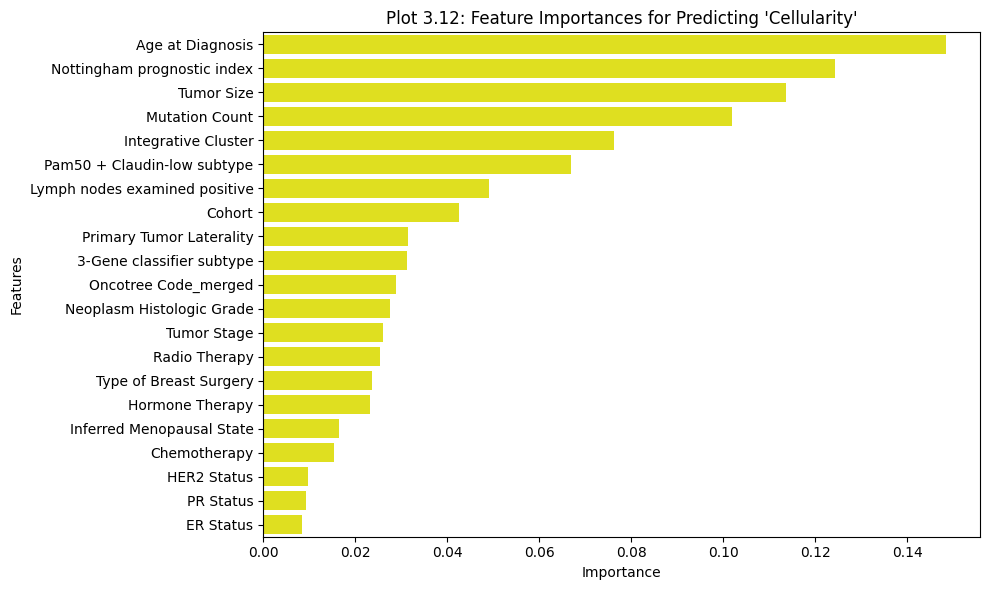

In [36]:
#Impute missing values of cellularity
RFC_feature_importance(df_import=df_mount.dropna().copy(), target_col='Cellularity', i= '3.12')

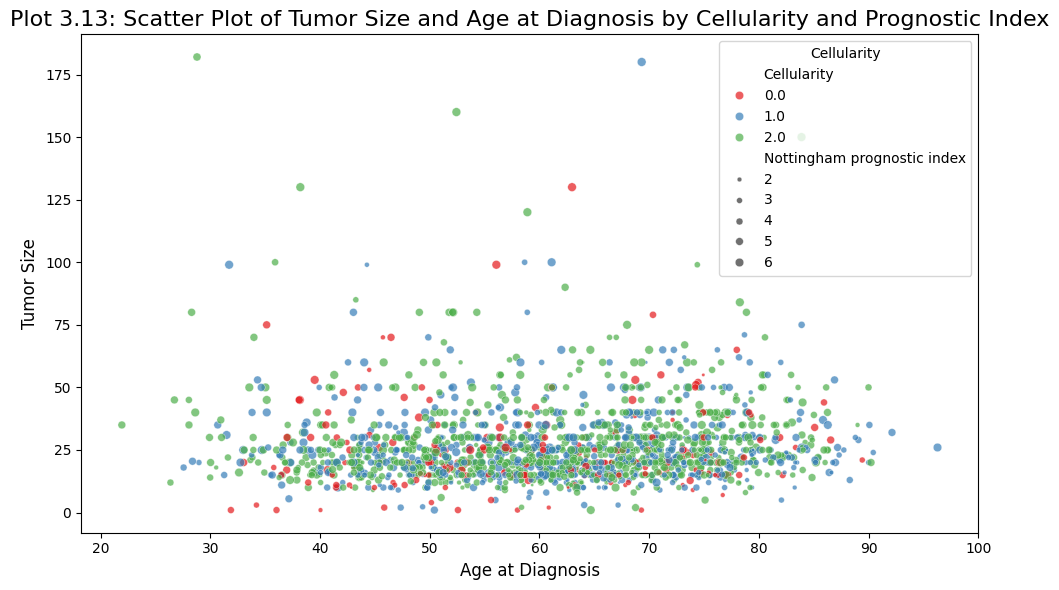

In [37]:
# Select key features based on feature importance
df_cell= df_mount[['Age at Diagnosis','Cellularity','Nottingham prognostic index','Tumor Size']].dropna()
#Visualize the distribution of label values across the important features
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_cell,
    x='Age at Diagnosis',
    y='Tumor Size',
    hue='Cellularity',
    palette='Set1',
    size='Nottingham prognostic index',  #Size of points
    sizes=(5, 40),  #The range of point size
    alpha=0.7
)


plt.title('Plot 3.13: Scatter Plot of Tumor Size and Age at Diagnosis by Cellularity and Prognostic Index', fontsize=16)
plt.xlabel('Age at Diagnosis', fontsize=12)
plt.ylabel('Tumor Size', fontsize=12)
plt.legend(title='Cellularity', loc='best')
plt.tight_layout()
plt.show()


'Age at diagnosis' appears to be the most important feature for classifying Cellularity. Howerver, the scatterplot show that Cellularity categories are evenly distributed across age, with no clear relationship. Therefore, we chose to impute the missing Cellularity values based on the observed proportions of each category in the existing data.

In [38]:
#Impute missing values
cellularity_dist = df_nonmiss['Cellularity'].value_counts(normalize=True)
# Display as a dictionary for easier sampling later
categories = cellularity_dist.index.tolist()
probs = cellularity_dist.values.tolist()

#Find the indices of missing values
missing_idx =df_nonmiss[df_nonmiss['Cellularity'].isna()].index

#Randomly sample based on the original distribution to fill missing values
np.random.seed(42)
filled_values = np.random.choice(categories, size=len(missing_idx), p=probs)

#Fill in the missing values
df_nonmiss.loc[missing_idx, 'Cellularity'] = filled_values

### 3.4.4 Imputing Missing Data in "Tumor Size"

In [39]:
#Define a feature importance function based on Random Forest Regression model
def RFR_feature_importance(df_import, target_col, i):

    # Step 1:Remove the rows with missing values in target column
    df_clean = df_import.dropna(subset=[target_col]).copy()

    # Step 2:Split features and label
    X = df_clean.drop(columns=[target_col])
    y = df_clean[target_col]

    # Step 4:Train the model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)

    # Step 5:Get the feature importance
    feature_importance = pd.Series(model.feature_importances_, index=X.columns)
    feature_importance = feature_importance.sort_values(ascending=False)

    #Visualize feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance.values, y=feature_importance.index)
    plt.title(f"Plot {i}: Feature Importances for Predicting '{target_col}'")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.show()

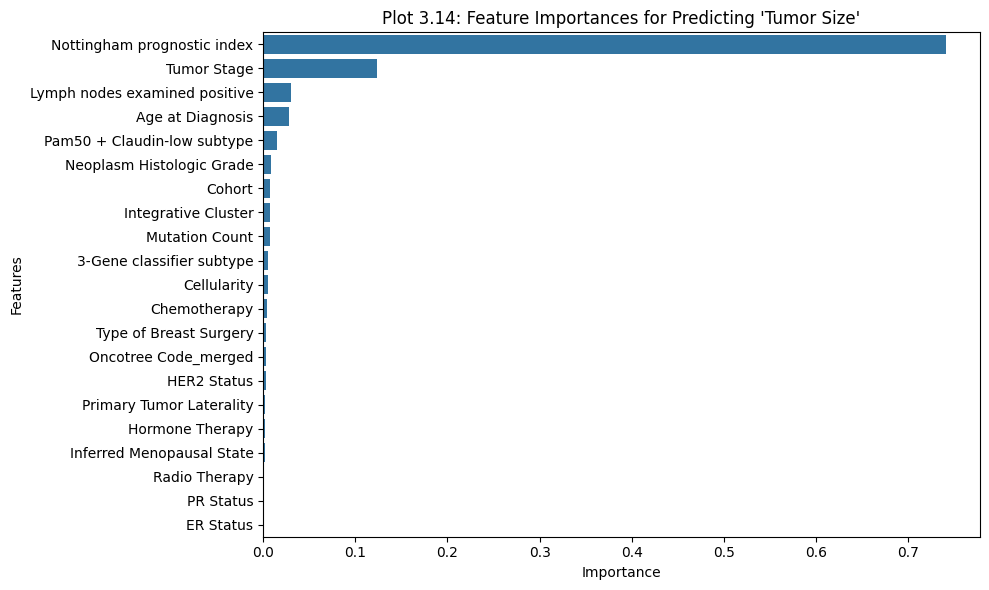

In [40]:
RFR_feature_importance(df_import=df_mount.dropna(), target_col= 'Tumor Size', i= '3.14')

In [41]:
#Identify the rows can be filled in df_nonmiss
condition = (
    df_nonmiss['Tumor Size'].isna() &
    df_nonmiss['Tumor Stage'].notna() &
    df_nonmiss['Nottingham prognostic index'].notna()
)
print(f"The number of missing 'Tumor Size' \n"
      f"values that can be imputed is:    {df_nonmiss[condition].shape[0]}")

The number of missing 'Tumor Size' 
values that can be imputed is:    7


The features that most strongly influence tumor size regression are the NPI and Tumor Stage. However because Tumor Stage has a large numer of missing values, the number of missing Tumor Size values that can be imputed is only 7.

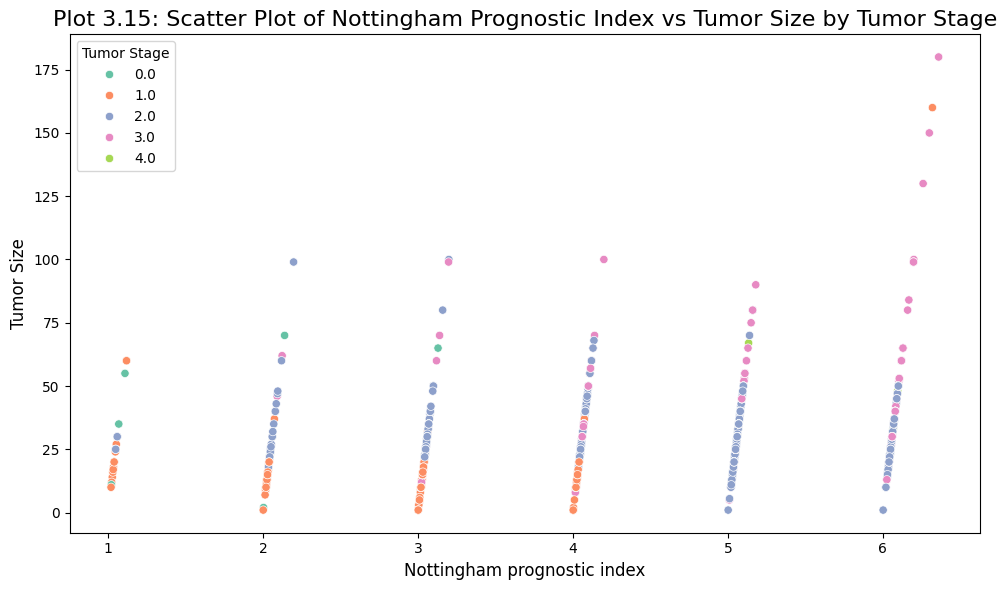

In [42]:
# Assuming df_mount is already loaded and contains 'Tumor Stage' and 'Tumor Size' columns
# Create a copy of the data without missing values
df_ts_ts_npi = df_mount[['Tumor Stage', 'Tumor Size','Nottingham prognostic index']].dropna().copy()

# Create a scatter plot using different colors to distinguish Tumor Stage
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Nottingham prognostic index',
    y='Tumor Size',
    data=df_ts_ts_npi,
    hue='Tumor Stage',
    palette='Set2',
    legend='full'  # Show the full legend
)

# Set the plot title and axis labels
plt.title('Plot 3.15: Scatter Plot of Nottingham Prognostic Index vs Tumor Size by Tumor Stage', fontsize=16)
plt.xlabel('Nottingham prognostic index', fontsize=12)
plt.ylabel('Tumor Size', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

Based on the distribution patterns observed in the scatterplot, we decided to build a KNN model to predict the missing tumor size values.

n_neighbors = 1
RMSE: 8.26
RMSE as % of Mean: 31.91%
R²: 0.60
n_neighbors = 2
RMSE: 5.78
RMSE as % of Mean: 22.33%
R²: 0.81
n_neighbors = 3
RMSE: 5.13
RMSE as % of Mean: 19.81%
R²: 0.85
n_neighbors = 4
RMSE: 5.46
RMSE as % of Mean: 21.10%
R²: 0.83
n_neighbors = 5
RMSE: 5.35
RMSE as % of Mean: 20.67%
R²: 0.83
n_neighbors = 6
RMSE: 5.30
RMSE as % of Mean: 20.50%
R²: 0.84
n_neighbors = 7
RMSE: 5.41
RMSE as % of Mean: 20.91%
R²: 0.83
n_neighbors = 8
RMSE: 5.60
RMSE as % of Mean: 21.65%
R²: 0.82
n_neighbors = 9
RMSE: 5.72
RMSE as % of Mean: 22.11%
R²: 0.81


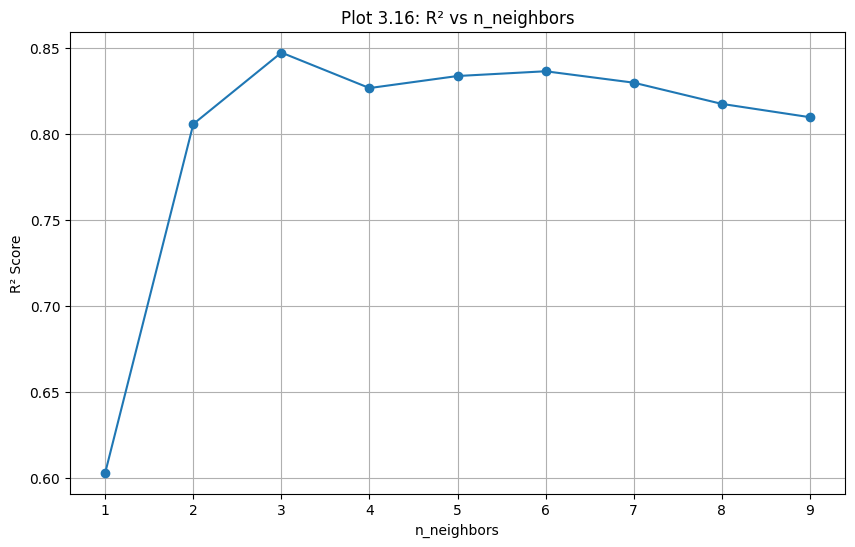

In [43]:
# Predict missing values based on a KNN model
df_ts_ts_npi= df_mount[['Tumor Stage','Nottingham prognostic index','Tumor Size']].dropna().copy()

X =df_ts_ts_npi.drop(columns='Tumor Size')
y = df_ts_ts_npi['Tumor Size']

#Data standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=95)
r2_scores = []
neighbor_values = []

for n in range(1, 10):
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse= np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f'n_neighbors = {n}')
    print(f'RMSE: {rmse:.2f}')
    print(f'RMSE as % of Mean: {rmse / y_test.mean() * 100:.2f}%')
    print(f'R²: {r2:.2f}')
    neighbor_values.append(n)
    r2_scores.append(r2)

# Visualize how R² changes as the number of neighbors (n_neighbors) varies
plt.figure(figsize=(10, 6))
plt.plot(neighbor_values, r2_scores, marker='o')
plt.title('Plot 3.16: R² vs n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('R² Score')
plt.grid(True)
plt.show()

When the number of neighbors is set to 3, the RMSE is approximately 20% of the mean tumor size, and the R² score IS 0.85. This indicates a moderate level of predictive accuracy. Given that we are only imputing 7 missing values, the model's performance is acceptable for the purpose.

In [44]:
#the best KNN model
knn_best= KNeighborsRegressor(n_neighbors=3)
knn_best.fit(X_train, y_train)
df_predict = df_nonmiss.loc[condition, ['Tumor Stage', 'Nottingham prognostic index']]

#Process and predict
X_pred_scaled = scaler.transform(df_predict)
predicted_ts = knn_best.predict(X_pred_scaled)

# Impute missing values at the identified locations
df_nonmiss.loc[condition, 'Tumor Size'] = predicted_ts

### 3.4.5 Imputing Missing Data in "Mutation Count"

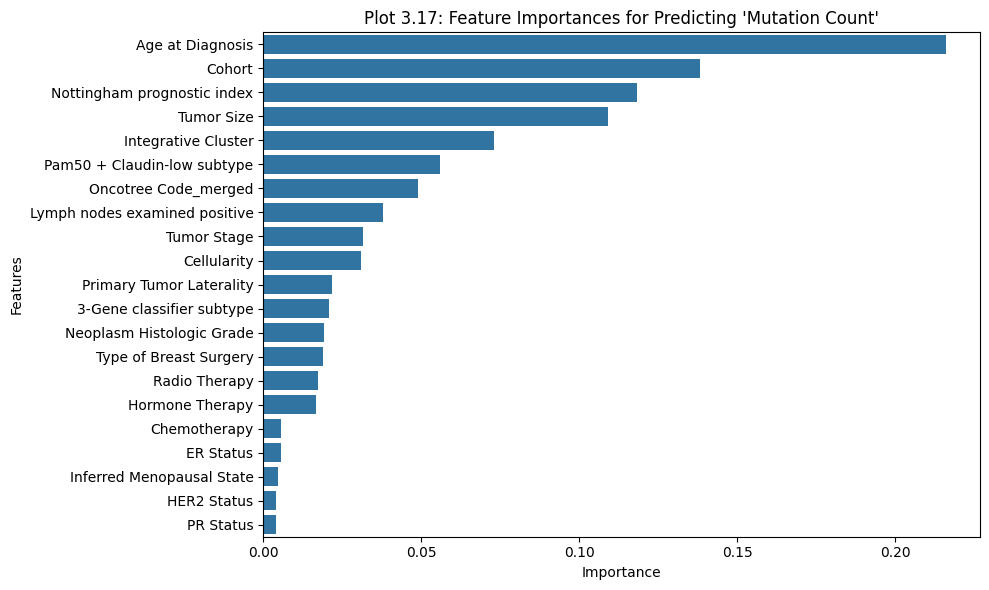

In [45]:
RFR_feature_importance(df_import=df_mount.dropna(),target_col= 'Mutation Count', i='3.17')

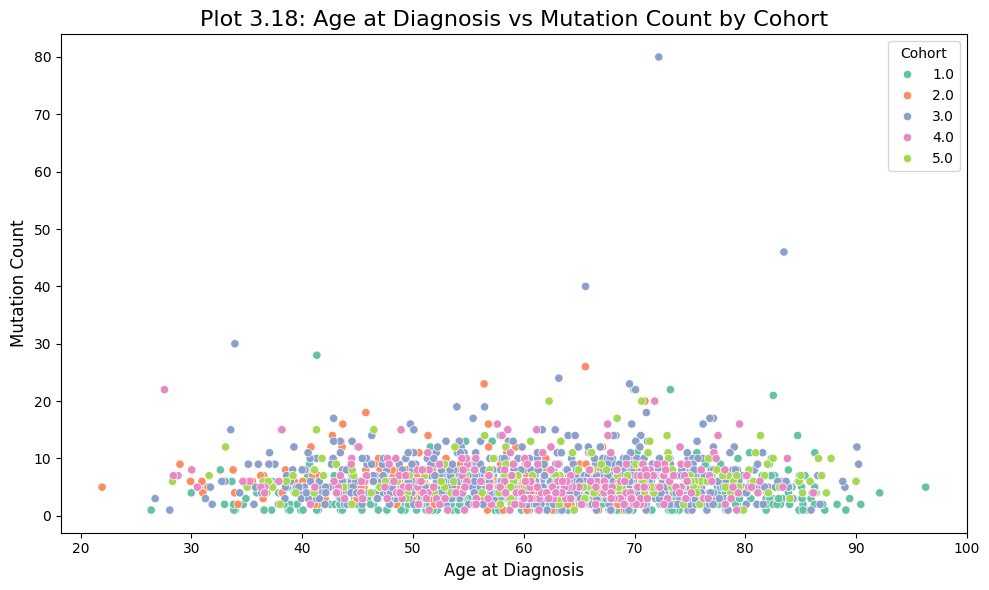

In [46]:
df_mc= df_mount[['Age at Diagnosis','Mutation Count','Cohort']].dropna()
#Create a scatterplot of Age at Diagnosis vs. Mutation Count, colored by Cohort
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Age at Diagnosis',
    y='Mutation Count',
    hue= 'Cohort',
    palette='Set2',
    data=df_mc,
    legend='full'
)

plt.title('Plot 3.18: Age at Diagnosis vs Mutation Count by Cohort', fontsize=16)
plt.xlabel('Age at Diagnosis', fontsize=12)
plt.ylabel('Mutation Count', fontsize=12)

plt.tight_layout()
plt.show()

Based on the distribution of points in the sctterplot of' Age at Diagnosis vs Mutation Countt, coloredd by Cohort', we observed that points of the same color are relatively densely clustered. Therefore we decided to impute missing values in 'Mutation Count' using the median value grouped by 'Cohort'.

In [47]:
condition = (
    df_nonmiss['Mutation Count'].isna() &
    df_nonmiss['Cohort'].notna()
)

# Impute missing values in 'Mutation Count' using the median value grouped by 'Cohort'
df_nonmiss.loc[condition, 'Mutation Count']  = df_nonmiss.groupby('Cohort')['Mutation Count'].transform(
    lambda x: x.fillna(x.median())
)

In [48]:
print('Data columns with null values:',  df_nonmiss.isnull().sum(), sep='\n')

Data columns with null values:
Age at Diagnosis                   0
Type of Breast Surgery            25
Cellularity                        0
Chemotherapy                       0
Pam50 + Claudin-low subtype        0
Cohort                             0
ER Status                          0
Neoplasm Histologic Grade          0
HER2 Status                        0
Hormone Therapy                    0
Inferred Menopausal State          0
Integrative Cluster                0
Primary Tumor Laterality         110
Lymph nodes examined positive      0
Mutation Count                     0
Nottingham prognostic index        0
Overall Survival (Months)          0
Overall Survival Status            0
PR Status                          0
Radio Therapy                      0
Relapse Free Status (Months)       0
Relapse Free Status                1
3-Gene classifier subtype        622
Tumor Size                        19
Tumor Stage                      514
Patient's Vital Status             1
Oncotre

The columns '3-Gene Classifier Subtype','Primary Tumor Laterality" and "Tumor Stage" still contain a significant number of missing values. 3-Gene Classifier Subtype is entirely derived from HER2 Status, PR, and ER, all of which are already included as separate variables in our model. Including the classifier alongside its component variables would introduce redundancy and multicollinearity. And, based on clinical intuition, "Primary Tumor Laterality" likely has minimal impact on survival or recurrence outcomes. Meanwhile, "Tumor Stage" is a constructed clinical classification largely derived from other biological indicators such as the Nottingham Prognostic Index, tumor size, and the number of positive lymph nodes.Since these contributing features are already included in the dataset, "Tumor Stage" may offer redundant information for survival analysis.
Therefore, we choose to retain the three columns and address theeir missing values as needed during the analysis next.

# 4 Prediction of Tumor Stage and Type of Breast Surgery

## 4.1 Predicting Tumor Stage

### 4.1.1 Random Forest

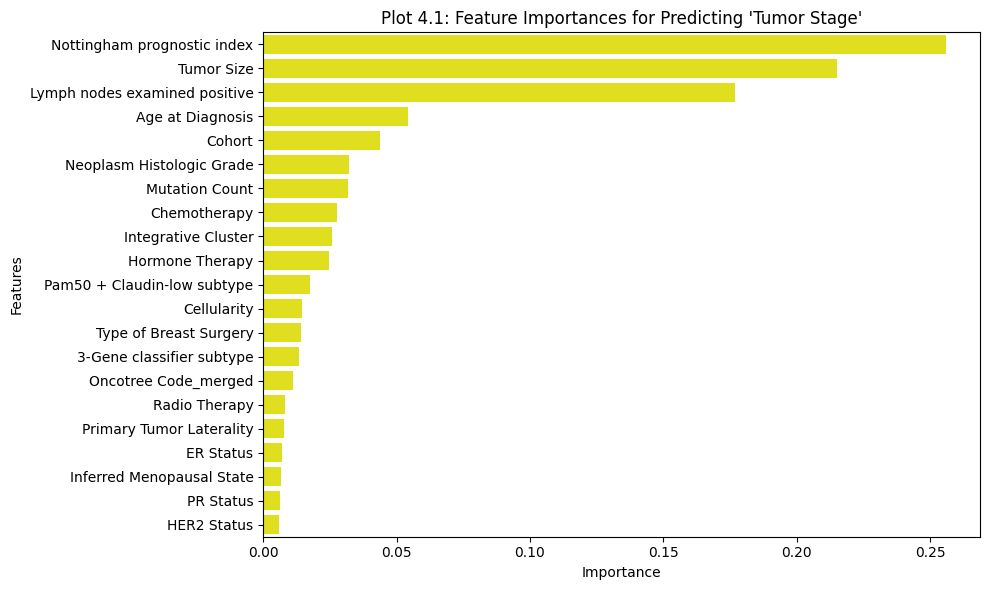

In [49]:
# Identify important features for predicting 'Tumor Stage'
RFC_feature_importance(df_import=df_mount.dropna().copy(), target_col='Tumor Stage', i= '4.1')

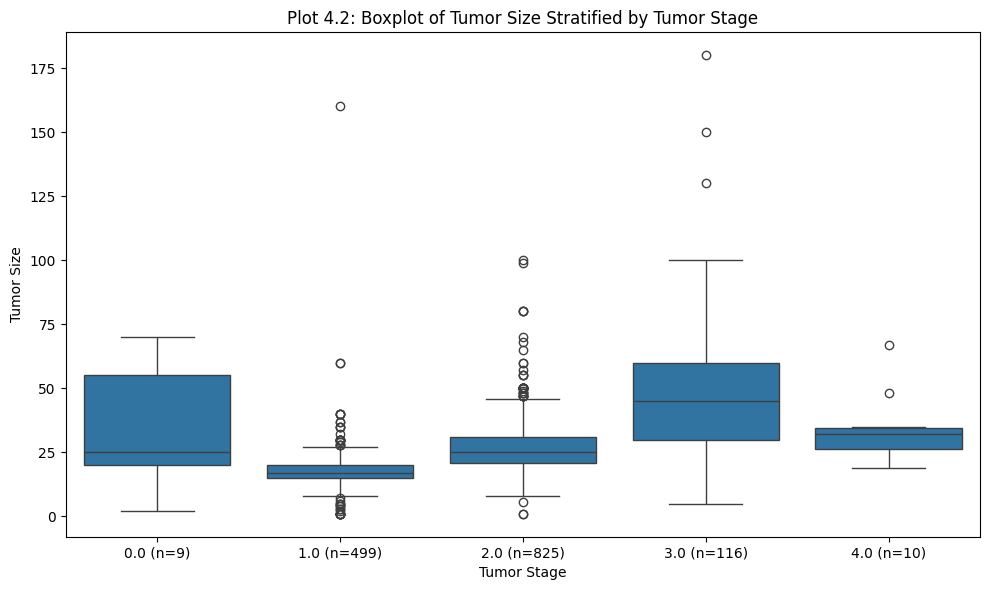

In [50]:
# Build a boxplot of tumor size stratified by tumor stage
# prepare dataset
df_st = df_mount[['Tumor Stage', 'Tumor Size']].dropna()

# Calculate sample size by each tumor stage
stage_counts = df_st['Tumor Stage'].value_counts().to_dict()

# Make a new label: with sample size
df_st['Tumor Stage Label'] = df_st['Tumor Stage'].apply(lambda x: f"{x} (n={stage_counts.get(x, 0)})")

# Build the plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tumor Stage Label', y='Tumor Size', data=df_st, order=sorted(df_st['Tumor Stage Label'].unique()))
plt.title('Plot 4.2: Boxplot of Tumor Size Stratified by Tumor Stage')
plt.xlabel('Tumor Stage')
plt.ylabel('Tumor Size')
plt.tight_layout()
plt.show()


The boxplot displays that Stage 0 and Stage 4 cases are very rare, with only 9 and 10 samples respectively. Due to the limited number of samples, it's not feasible to build a reliable model to predict these stages. Therefore, we focus our analysis and prediction efforsts on Tumor Stage 1, 2 and 3.

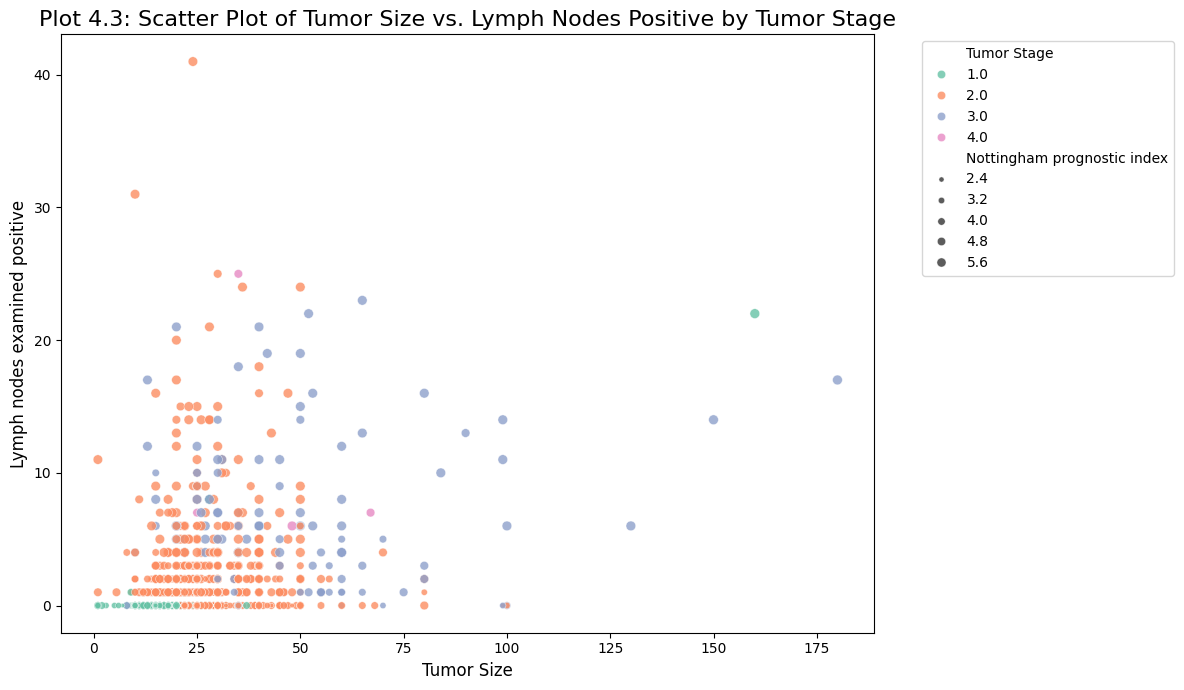

In [51]:
# Filter the dataset to include only top-ranked features
df_st = df_mount[['Nottingham prognostic index','Tumor Size', 'Tumor Stage',
                  'Lymph nodes examined positive','Cohort', 'Mutation Count',
                  'Integrative Cluster','Hormone Therapy','Neoplasm Histologic Grade']].dropna()
# Visualize the distribution of samples across Tumor Size and Lymph Nodes Examined Positive, grouped by Tumor Stage
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_st,
    x='Tumor Size',
    y='Lymph nodes examined positive',
    hue='Tumor Stage',
    size='Nottingham prognostic index',
    sizes=(10, 50),
    palette='Set2',
    alpha=0.8
)

plt.title('Plot 4.3: Scatter Plot of Tumor Size vs. Lymph Nodes Positive by Tumor Stage', fontsize=16)
plt.xlabel('Tumor Size', fontsize=12)
plt.ylabel('Lymph nodes examined positive', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

From the scatterplot of Tumor Size vs. Lymph Nodes Examined Positive  colored by Tumor Stage, we observe that Stage 1 tumors form a distinct cluster with minimal overlap with other stages. In contrast, Stages 2 and 3 show significant overlap and lack clear boundaries. Therefore, a two-step modeling approach is appropriate: first, build a model to distinguish Stage 1 from Stages 2 and 3 combined; then, build a second model to differentiate between Stage 2 and Stage 3.

In [52]:
# Split features and target label
# Keep only rows with Tumor Stage in [1, 2, 3]
df_rf = df_st[df_st['Tumor Stage'].isin([1, 2, 3])].copy()

df_rf['Stage_1_vs_23'] = (df_rf['Tumor Stage'] == 1).astype(int)
X = df_rf.drop(columns=['Tumor Stage', 'Stage_1_vs_23'])
y = df_rf['Stage_1_vs_23']

# Split into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)

In [53]:
ts_model1 = RandomForestClassifier(n_estimators=100, random_state=42 )
ts_model1.fit(X_train, y_train)
# Predict target values using the trained model
y_pred = ts_model1.predict(X_test)

# Evaluate the model performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[220   2]
 [  4 100]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       222
           1       0.98      0.96      0.97       104

    accuracy                           0.98       326
   macro avg       0.98      0.98      0.98       326
weighted avg       0.98      0.98      0.98       326



As expected, the model performs exceptionally well in predicting Tumor Stage 1 and Tumor Stage 2&3.

In [54]:
# Classify Stage 2 and Stage 3 using the same method
df_rf = df_st[df_st['Tumor Stage'].isin([2, 3])]
X = df_rf.drop(columns='Tumor Stage')
y = df_rf['Tumor Stage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)
model2= RandomForestClassifier(random_state=44 )
ts_model2= model2.fit(X_train,y_train)
y_pred = ts_model2.predict(X_test)
y_proba = ts_model2.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

Confusion Matrix:
 [[225   4]
 [ 14  15]]
Classification Report:
               precision    recall  f1-score   support

         2.0       0.94      0.98      0.96       229
         3.0       0.79      0.52      0.62        29

    accuracy                           0.93       258
   macro avg       0.87      0.75      0.79       258
weighted avg       0.92      0.93      0.92       258

AUC Score: 0.9385


The model is excellent at identifying Stage 2, but misses nearly half of Stage 3 cases. Since the dataset is imbalanced(with 825 samples for Stage 2 and only 116 for Stage3), we apply oversampling to address this imbalance. Our goal is to improve the model's performance, particularly in accurately identifying Stage 3 cases.

In [55]:
# Perform oversampling on the training set
sm = SMOTE(random_state=48)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)
#Check counts of label values after oversampling
print(y_resampled.isin([3]).value_counts())
print(y_resampled.isin([2]).value_counts())

Tumor Stage
False    523
True     523
Name: count, dtype: int64
Tumor Stage
True     523
False    523
Name: count, dtype: int64


In [56]:
# Perform grid search to find the best hyperparameters
#Set up the grid search parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf':[10, 15, 20]
}
f1_class3= make_scorer(f1_score, pos_label=3)
precision_class3= make_scorer(precision_score, pos_label=3)
recall_class3= make_scorer(recall_score, pos_label=3)
# Run grid search
grid_search = GridSearchCV(model2, param_grid, cv=5, scoring=f1_class3, n_jobs=-1)

In [57]:
grid_search.fit(X_resampled, y_resampled)
#Get the best model
print(grid_search.best_estimator_)
print(grid_search.best_score_)
bst_ts_model2 = grid_search.best_estimator_
y_pred = bst_ts_model2.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(f"AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=200,
                       random_state=44)
0.9213633731943591
              precision    recall  f1-score   support

         2.0       0.96      0.91      0.94       229
         3.0       0.51      0.72      0.60        29

    accuracy                           0.89       258
   macro avg       0.74      0.82      0.77       258
weighted avg       0.91      0.89      0.90       258

[[209  20]
 [  8  21]]
AUC Score: 0.9385


After applying oversampling, the best_performing model(identified through grid search) produced mixed results. While the F1 score remained nearly unchanged, the recall for Stage 3 improved from 0.52 to 0.72- indicating better sensitivity. However. this came at the cost of reduced precision. Next, we will train an alternative model for comparison.

### 4.1.2 SVM

In [58]:
#Establish a SVM model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

kernels = ['linear', 'rbf', 'poly', 'sigmoid']
for kernel in kernels:
    print(f"\n=== Kernel: {kernel} ===")

    #Set up and train a SVM model
    svm = SVC(kernel=kernel, probability=True, class_weight='balanced', random_state=99)
    svm.fit(X_train_scaled, y_resampled)

    #Predict target values based on the trained model
    y_pred = svm.predict(X_test_scaled)
    y_proba = svm.predict_proba(X_test_scaled)[:, 1]

    #Evaluation
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print(f"AUC Score: {roc_auc_score(y_test, y_proba):.4f}")


=== Kernel: linear ===
Confusion Matrix:
 [[187  42]
 [  4  25]]
Classification Report:
               precision    recall  f1-score   support

         2.0       0.98      0.82      0.89       229
         3.0       0.37      0.86      0.52        29

    accuracy                           0.82       258
   macro avg       0.68      0.84      0.71       258
weighted avg       0.91      0.82      0.85       258

AUC Score: 0.8961

=== Kernel: rbf ===
Confusion Matrix:
 [[206  23]
 [  8  21]]
Classification Report:
               precision    recall  f1-score   support

         2.0       0.96      0.90      0.93       229
         3.0       0.48      0.72      0.58        29

    accuracy                           0.88       258
   macro avg       0.72      0.81      0.75       258
weighted avg       0.91      0.88      0.89       258

AUC Score: 0.8821

=== Kernel: poly ===
Confusion Matrix:
 [[193  36]
 [  2  27]]
Classification Report:
               precision    recall  f1-score  

We trained several SVM models using different kernels. Among them, the model with a polynomial kernel achieved the highst F1-score for Stage 3 and perfect recall, meaning it successfully identified all Stage 3 cases. However, the precision was poor- over half of the predicted Stage 3 cases were incorrect- indicating a high false positive rate.

In [59]:
#Define a basic model
svm = SVC(kernel='poly', probability=True, random_state=99)

#Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'class_weight': ['balanced',  {2: 1, 3: 2},
                     {2: 2, 3: 5}, {2: 2, 3: 3}]
}

#Run grid search

f1_class3= make_scorer(f1_score, pos_label=3)
precision_class3 = make_scorer(precision_score, pos_label=3, average='binary')
grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring=precision_class3, #Maximize precision score specifically for class 3
    cv=5,
    n_jobs=-1,
    verbose=2
)

In [60]:
#Train
grid_search.fit(X_train_scaled, y_resampled)
#Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best precision of class3", grid_search.best_score_)

#Test the best model using test set
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test_scaled)

#Convert the scaled data back to the original form
y_proba= best_svm.predict_proba(X_test_scaled)[:, 1]

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(f"AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'C': 100, 'class_weight': 'balanced'}
Best precision of class3 0.862353298875038
              precision    recall  f1-score   support

         2.0       0.99      0.89      0.94       229
         3.0       0.51      0.90      0.65        29

    accuracy                           0.89       258
   macro avg       0.75      0.89      0.79       258
weighted avg       0.93      0.89      0.90       258

[[204  25]
 [  3  26]]
AUC Score: 0.9050


After tuning the hyperparameters through gird search, the SVM model with a polynomial kernel showed a slight improvement in precision, though it remains below the ideal level.

Comparison: Both the Random Forest and SVM models demonstrate excellent predictive ability for Stage 2, but both struggle with precision for Stage 3. However, the SVM model with a polynomial kernel stands out by achieving perfect recall for Stage 3, meaning it successfully identifies all true Stage 3 cases-a critical advantage.

Given that Stage 3 tumors are more severe, it's more acceptable in practice to misclassify a Stage 2 tumor as Stage 3 than to miss a true Stage 3 case. Though, despite its lower precision, the SVM model with a polynomial kernel is the most suitable choice. This model can be effectively used for the preliminary screening of Stage 3 Tumors, helping to identify potential high-risk cases. However, further clinical analysis is necessary to confirm Stage 3 diagnosis with greater accuracy.

## 4.2 Predicting Type of Breast Surgery

In [61]:
#Explore prediction of Type of Breast Surgery
df_surgery = df_mount.copy().dropna()
#Separate features and target column
X_full = df_surgery.drop(columns=['Type of Breast Surgery'])
y = df_surgery['Type of Breast Surgery']

# Split into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.25, random_state=35)
#Build a Random forest model
rfc = RandomForestClassifier(n_estimators=100, random_state=35)
rfc_model= rfc.fit(X_train, y_train)
#Predict label values
y_pred = rfc_model.predict(X_test)
y_proba = rfc_model.predict_proba(X_test)[:, 1]

#Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

Confusion Matrix:
 [[ 71  23]
 [ 16 101]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.76      0.78        94
         1.0       0.81      0.86      0.84       117

    accuracy                           0.82       211
   macro avg       0.82      0.81      0.81       211
weighted avg       0.82      0.82      0.81       211

AUC Score: 0.8913


The classification report shows that the model performs better in predicting class 1.0 than 0.0. Specially,it acheives a precision of 0.84 and a recall of 0.88 for class 1, indicating that it is both accurate and effective at identifying most positive cases. In contrast, for class 0, the precision is slightly lower at 0.79, and the recall drops to 0.74, suggesting the model is somewhat less reliable in identifying this class. We will now apply several strategies to further enhance the model's performance- particularly for the underperforming class.

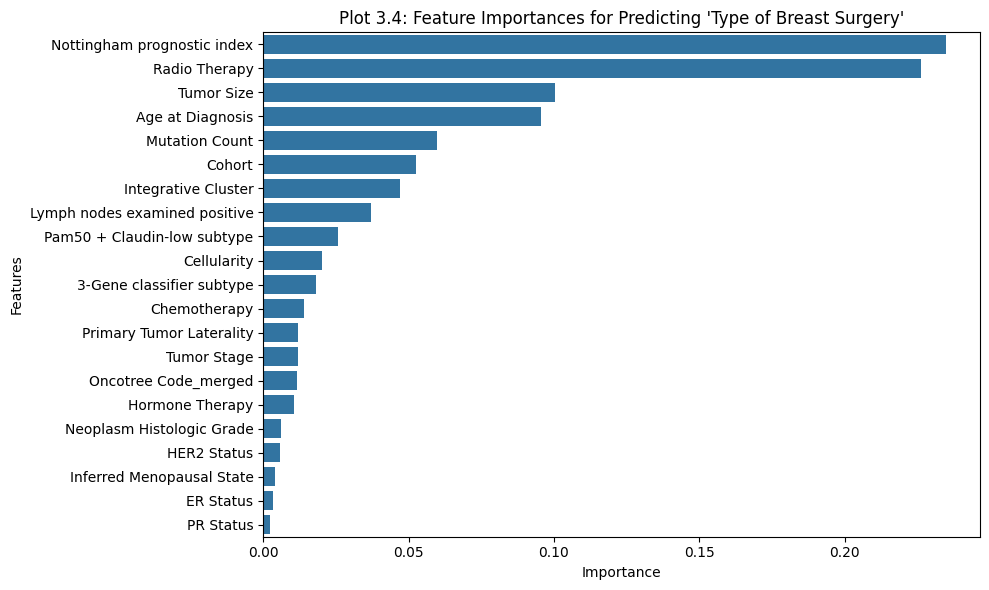

In [62]:
RFR_feature_importance(df_import=df_mount.dropna(),target_col= 'Type of Breast Surgery', i= '3.4')

In [63]:
#Select features with higher importance to improve the model performance
df_surgery= df_mount[['Radio Therapy', 'Age at Diagnosis', 'Nottingham prognostic index',
                        'Tumor Size', 'Lymph nodes examined positive',
                        'Mutation Count','Integrative Cluster', 'Cohort',
                        'Pam50 + Claudin-low subtype',
                        'Cellularity','Type of Breast Surgery']].copy().dropna()

In [64]:
#Get train set and test set
X_full = df_surgery.drop(columns=['Type of Breast Surgery'])
y = df_surgery['Type of Breast Surgery']
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.25, random_state=58)

In [65]:
#Apply Oversampling on the train set
sm = SMOTE(random_state=73)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)
#Optimize the model
from sklearn.model_selection import KFold
#Focus on improvement of f1 score for class 0
f1_class0= make_scorer(f1_score, pos_label=0.0)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 6, None],
    'min_samples_split': [8, 10, 15],
    'min_samples_leaf': [8, 10, 15]
}

grid_search= GridSearchCV(rfc,param_grid=param_grid,scoring=f1_class0 ,
             cv=KFold(n_splits=5, shuffle=True, random_state=42),n_jobs=-1)


In [66]:
grid_search.fit(X_resampled, y_resampled)
#Get the parameters of the best model
print(grid_search.best_estimator_)
print(grid_search.best_score_)
bst_rfc = grid_search.best_estimator_
y_pred = bst_rfc.predict(X_test)
#Evaluate performance of the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

RandomForestClassifier(min_samples_leaf=8, min_samples_split=8, random_state=35)
0.848174220687345
              precision    recall  f1-score   support

         0.0       0.80      0.79      0.79       177
         1.0       0.86      0.87      0.86       268

    accuracy                           0.84       445
   macro avg       0.83      0.83      0.83       445
weighted avg       0.84      0.84      0.84       445

[[140  37]
 [ 36 232]]


After applying strategies such as oversampling and grid search, the precision for class 0 improved from 0.74 to 0.79. Meanwhile, the precision and overall performance for class 1 remained nearly unchanged. Overall, the final model demonstrate strong predictive ability for class 1 and a reasonable level of accuracy for class 0.

Howerver, it may still lead to incorrect predictions regarding breast surgery type. To further enhance performance, especially for class 0, increasing the sample size is recommended.

In [67]:
df_new= df_nonmiss.copy()
df_new = df_new.dropna(subset=['Tumor Size','Relapse Free Status'])
print('Data columns with null values:',  df_new.isnull().sum(), sep='\n')

Data columns with null values:
Age at Diagnosis                   0
Type of Breast Surgery            21
Cellularity                        0
Chemotherapy                       0
Pam50 + Claudin-low subtype        0
Cohort                             0
ER Status                          0
Neoplasm Histologic Grade          0
HER2 Status                        0
Hormone Therapy                    0
Inferred Menopausal State          0
Integrative Cluster                0
Primary Tumor Laterality         108
Lymph nodes examined positive      0
Mutation Count                     0
Nottingham prognostic index        0
Overall Survival (Months)          0
Overall Survival Status            0
PR Status                          0
Radio Therapy                      0
Relapse Free Status (Months)       0
Relapse Free Status                0
3-Gene classifier subtype        614
Tumor Size                         0
Tumor Stage                      495
Patient's Vital Status             0
Oncotre

# 5 Constructing Kaplan-Meier Models

## 5.1 Data Preprocessing

In [68]:
#Get the dataset for analysis of Overall Survival
df_oss = df_new.drop(columns=['Relapse Free Status (Months)', 'Relapse Free Status']).copy()

#Encoding the Overall Survival
df_oss['Overall Survival Status'] = df_oss['Overall Survival Status'].map({'Living': 0,
                                                                           'Deceased': 1}).astype(np.uint8)
# DSS: Only breast cancer-specific death is considered an event; all other cases are treated as censored.
df_oss['event_DSS'] = df_oss["Patient's Vital Status"].map({'Living': 0,'Died of Other Causes': 0,'Died of Disease': 1}).astype(np.uint8)

df_oss= df_oss.drop(columns="Patient's Vital Status")

#Geting the dataset for analysis of Relapse Free Time
df_rfs = df_new.drop(columns=['Overall Survival (Months)', 'Overall Survival Status', "Patient's Vital Status"])

#Encoding the Relapse Free Status
df_rfs['Relapse Free Status'] = df_rfs['Relapse Free Status'].map({'Not Recurred': 0, 'Recurred': 1}).astype(np.uint8)

## 5.2 Kaplan-Meier Curves

### 5.2.1 Overall Kaplan-Meier Survival Curves

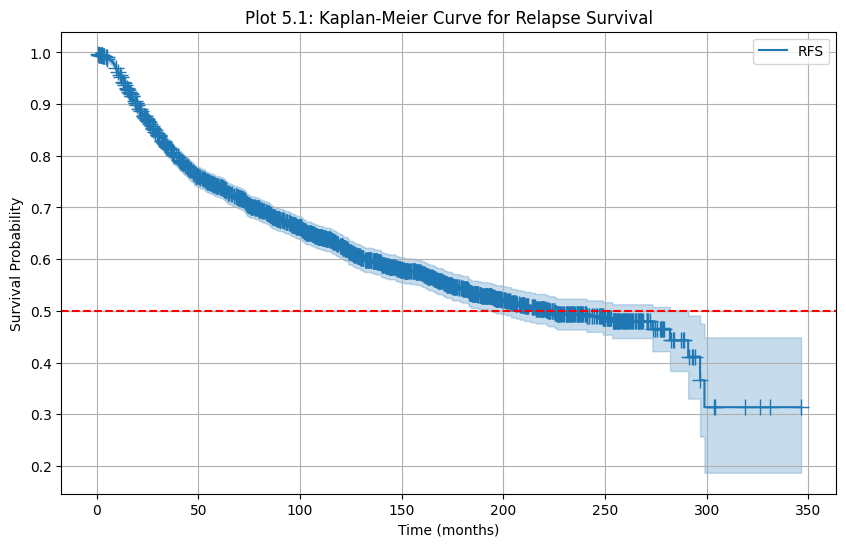

In [69]:
from lifelines import KaplanMeierFitter
kmf_rfs = KaplanMeierFitter()

kmf_rfs.fit(durations=df_rfs['Relapse Free Status (Months)'],
            event_observed=df_rfs['Relapse Free Status'],
            label='RFS')
plt.figure(figsize=(10, 6))
kmf_rfs.plot(ci_show=True, show_censors=True)

plt.axhline(0.5, color='red', linestyle='--')
plt.title("Plot 5.1: Kaplan-Meier Curve for Relapse Survival")
plt.xlabel("Time (months)")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.legend()
plt.show()

The relapse-free survival curve experences a sharp drop within the first 50 months, suggesting a higher risk of relaps during the early stage. Beyond this point, the curve flattens, indicating a slower rate of decline in relapse-free probability over long term.

The relapse-free survival curve falls to 0.5 between 200 and 250 months. After 270 months, the probability of remaining relapse-free declines further to around 0.3. Due to the decreasing number of patients at risk in the later follow-up period, the confidence interval become noticeably wider.

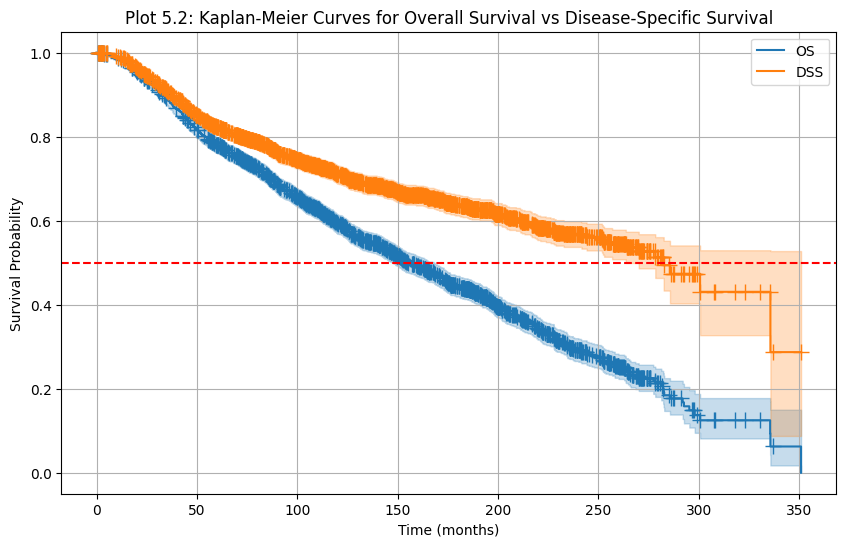

In [70]:
kmf_os = KaplanMeierFitter()
kmf_dss = KaplanMeierFitter()

kmf_os.fit(durations=df_oss['Overall Survival (Months)'],
           event_observed=df_oss['Overall Survival Status'],
           label='OS')
kmf_dss.fit(durations=df_oss['Overall Survival (Months)'],
            event_observed=df_oss['event_DSS'],
            label='DSS')
plt.figure(figsize=(10, 6))
kmf_os.plot(ci_show=True, show_censors=True)
kmf_dss.plot(ci_show=True, show_censors=True)

plt.axhline(0.5, color='red', linestyle='--')
plt.title("Plot 5.2: Kaplan-Meier Curves for Overall Survival vs Disease-Specific Survival")
plt.xlabel("Time (months)")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.legend()
plt.show()

Both the Overall Survival (OS) and Disease-Specific Survival (DSS) Kaplan-Meier curves demonstrate a declining survival probability over time. In the first 50 months, both curves almost overlap, indicating that most deaths during this period are attributable to breast cance itself. However, beyond this point, the DSS curve begins to decline at a significantly slower pace, suggesting that breast cancer is better controlled with treatment. Meanwhile, the OS curve continue its linear decline, with a growing gap between the two curves. This widening gap between OS and DSS curves could potentially be associated with factors such as treatment-related complications, comorbidities, or age related conditions.

Notably, the median survival time for OS is approximately 150 months, while for DSS it is much longer (around 280 months), underscoring the contribution of non-disease-specific mortality to overall survival outcomes. Additionally, after 250 months, the confidence intervals for both curves widen substantially, especially for DSS, indicating a reduced number of patients at risk and increasing statistical uncertainty. This necessittates cautious interpretation of long-term survival differences. This growing gap between the two curves overtime highlights the importance of distinguishing between breast cancer and overall mortality in long-term cancer prognosis studies.

### 5.2.2 Kaplan-Meier Survival Curves by Primary Tumor Laterality

In [71]:
#Define a function to plot Kaplan-Meier survival curves grouped by a specified column.
def plot_kaplan_meier_by_group(df_group, duration_col, event_col, group_col, title, group_name_map=None):
#Parameters:
#df_group : The input DataFrame containing survival data.
#duration_col : The column name representing the duration (e.g., time to event or censoring).
#event_col :The column name representing the event indicator (1 if event occurred, 0 if censored).
#group_col : The column name used to group the data
#title: Plot title
#group_name_map : A dictionary to map group values to more readable or meaningful labels (default is None).

    df= df_group.dropna(subset=[group_col])
    #Get the unique groups of a column
    groups = df[group_col].dropna().unique()
    colors =  plt.get_cmap('tab10', len(groups))


    fig, ax = plt.subplots(figsize=(10, 5))

    for i, group in enumerate(groups):
        df_sub = df[df[group_col] == group]
        if df_sub.empty:
            continue

        kmf = KaplanMeierFitter()
        label = group_name_map.get(group, group) if group_name_map else group


        kmf.fit(
            durations=df_sub[duration_col],
            event_observed=df_sub[event_col],
            label=label
        )
        kmf.plot(ax=ax, ci_show=False, show_censors=True, color=colors(i))

    #Optimize the plot
    ax.set_title(f"{title}", fontsize=18)
    ax.set_xlabel("Time", fontsize=14)
    ax.set_ylabel("Survival Probability", fontsize=14)
    ax.legend(title=group_col, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
    ax.grid(True)
    plt.tight_layout()
    plt.show()

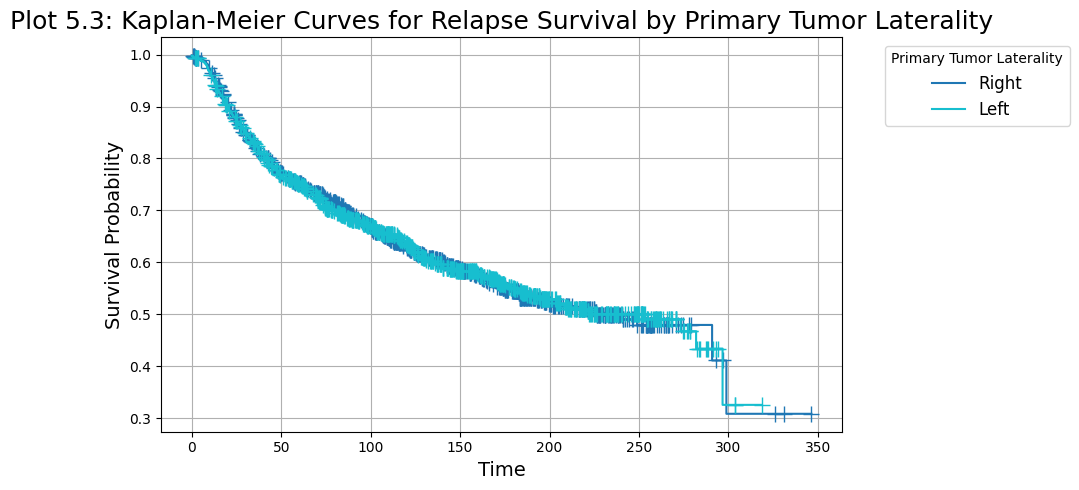

In [72]:
plot_kaplan_meier_by_group(
    df_group=df_rfs,
    duration_col='Relapse Free Status (Months)',
    event_col='Relapse Free Status',
    group_col='Primary Tumor Laterality',
    title= 'Plot 5.3: Kaplan-Meier Curves for Relapse Survival by Primary Tumor Laterality',
    group_name_map={i: class_name for i, class_name in enumerate(encoders['Primary Tumor Laterality'].classes_)},
)

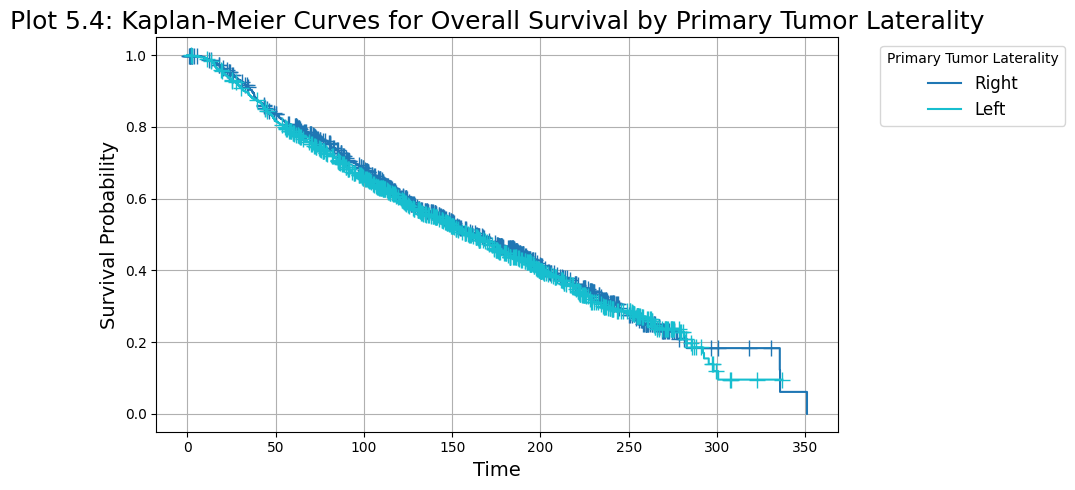

In [73]:
plot_kaplan_meier_by_group(
    df_group=df_oss,
    duration_col='Overall Survival (Months)',
    event_col='Overall Survival Status',
    group_col='Primary Tumor Laterality',
    title= 'Plot 5.4: Kaplan-Meier Curves for Overall Survival by Primary Tumor Laterality',
    group_name_map={i: class_name for i, class_name in enumerate(encoders['Primary Tumor Laterality'].classes_)},
)

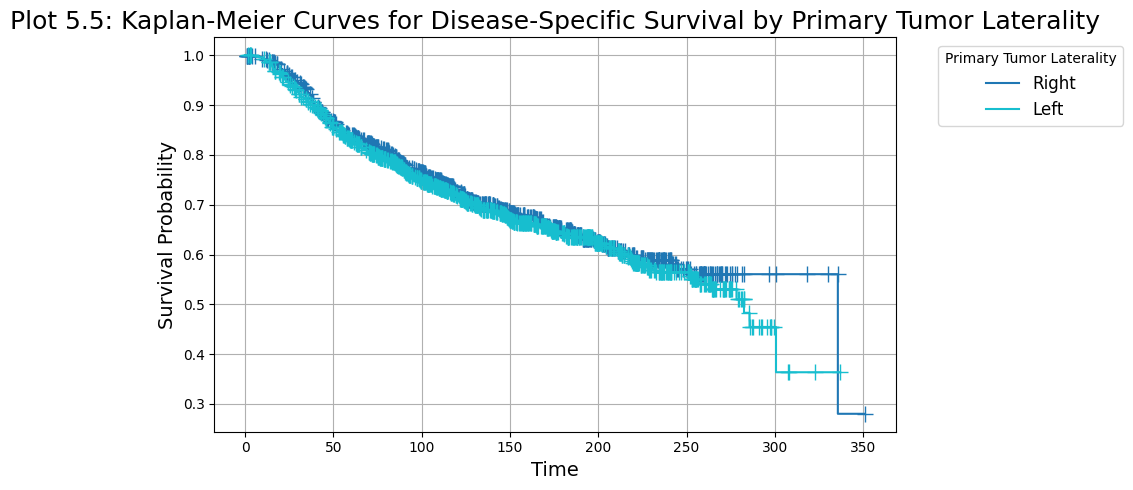

In [74]:
plot_kaplan_meier_by_group(
    df_group=df_oss,
    duration_col='Overall Survival (Months)',
    event_col='event_DSS',
    group_col='Primary Tumor Laterality',
    title= 'Plot 5.5: Kaplan-Meier Curves for Disease-Specific Survival by Primary Tumor Laterality',
    group_name_map={i: class_name for i, class_name in enumerate(encoders['Primary Tumor Laterality'].classes_)},
)

Initial Kaplan-Meier survival curves for each outcome demonstrated that the survival trajectories for different Primary Tumor Laterality (PTL) groups were nearly identical, with substantial overlap throughout the follow-up period. This visual similarity suggests that PTL may not significantly affect these survival outcomes.

To statistically assess this observation, a univariate Cox proportional hazards regression was conducted for PTL across each survival endpoint. The analysis focused on the Hazard Ratio (HR) and its 95% Confidence Interval (CI). An HR with a 95% CI that includes 1 implies no significant association between the variable and the survival outcome.

In [75]:
def variasign(df, event_col, duration_col, feature):
    print("Result for", event_col, ":")

    pd.set_option('display.expand_frame_repr', False)
    cph = CoxPHFitter()
    cph.fit(df[[event_col, duration_col, feature]].dropna(),
        duration_col=duration_col,
        event_col= event_col)
    summary = cph.summary
    summary['significant'] = ~((summary['exp(coef) lower 95%'] <= 1) & (summary['exp(coef) upper 95%'] >= 1))
    print(summary[['coef','exp(coef) lower 95%', 'exp(coef) upper 95%', 'significant']], "\n\n")

variasign(df= df_rfs,event_col= 'Relapse Free Status',
          duration_col='Relapse Free Status (Months)',
          feature= 'Primary Tumor Laterality' )

variasign(df= df_oss,event_col='Overall Survival Status',
          duration_col='Overall Survival (Months)',
          feature= 'Primary Tumor Laterality' )

variasign(df= df_oss,event_col='event_DSS',
          duration_col='Overall Survival (Months)',
          feature= 'Primary Tumor Laterality' )

Result for Relapse Free Status :
                              coef  exp(coef) lower 95%  exp(coef) upper 95%  significant
covariate                                                                                
Primary Tumor Laterality -0.001308             0.864702             1.153446        False 


Result for Overall Survival Status :
                              coef  exp(coef) lower 95%  exp(coef) upper 95%  significant
covariate                                                                                
Primary Tumor Laterality -0.045814             0.846041             1.078488        False 


Result for event_DSS :
                              coef  exp(coef) lower 95%  exp(coef) upper 95%  significant
covariate                                                                                
Primary Tumor Laterality -0.060603             0.800635             1.106436        False 




The results indicated that, for all three survival outcomes, the HRs for PTL had 95% CIs encompassing 1. This finding corroborates the Kaplan-Meier analysis, reinforcing the conclusion that PTL does not have a statistically significant impact on OS, DSS, or RFS in this dataset. Therefore, the variable can be omitted from the survival model construction.

### 5.1.3 Kaplan-Meier Survival Curves by '3-Gene classifier subtype' Groups

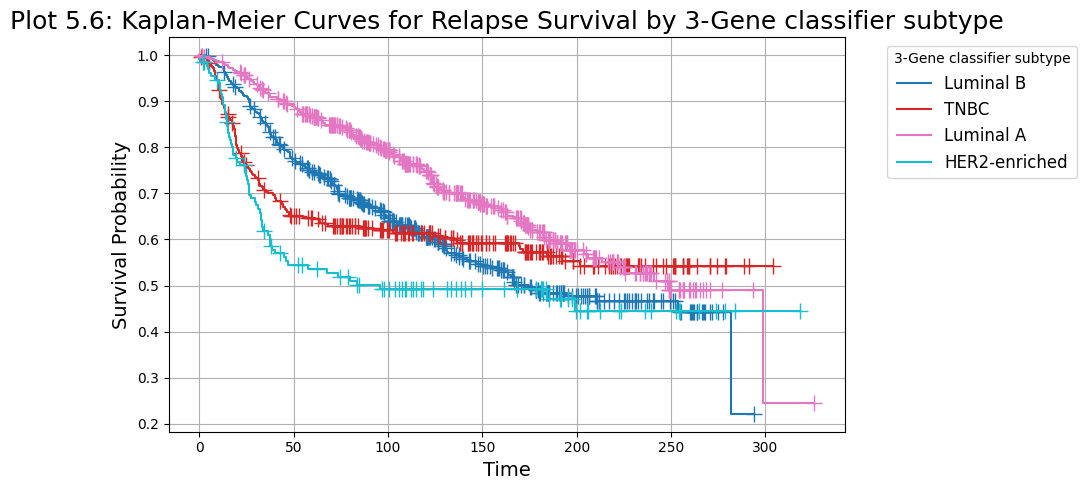

In [76]:
plot_kaplan_meier_by_group(
    df_group=df_rfs,
    duration_col='Relapse Free Status (Months)',
    event_col='Relapse Free Status',
    group_col='3-Gene classifier subtype',
    title= 'Plot 5.6: Kaplan-Meier Curves for Relapse Survival by 3-Gene classifier subtype',
    group_name_map= {i: class_name for i, class_name in enumerate(encoders['3-Gene classifier subtype'].classes_)}
)

Luminal A consistently maintained the highest recurrence-free survival rate (gradual linear decline), while HER2+ enriched negative exhibited the lowest survival rate throughout (plummeting to 55% within 50 months). Both TNBC and Luminal B initially declined, but TNBC entered a plateau phase after 50 months (<10% decline over 200 months), surpassing Luminal B beyond 120 months to establish long-term survival advantage.

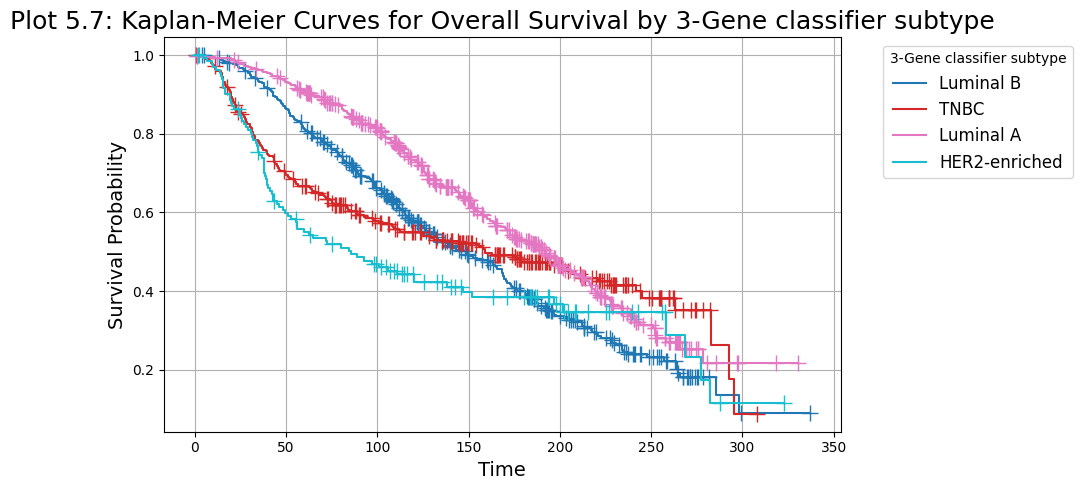

In [77]:
plot_kaplan_meier_by_group(
    df_group=df_oss,
    duration_col='Overall Survival (Months)',
    event_col='Overall Survival Status',
    group_col='3-Gene classifier subtype',
    title= 'Plot 5.7: Kaplan-Meier Curves for Overall Survival by 3-Gene classifier subtype',
    group_name_map= {i: class_name for i, class_name in enumerate(encoders['3-Gene classifier subtype'].classes_)}
)

OS curves were relatively compact. Luminal subtypes displayed continuous late-stage decline, resulting in the lowest final survival rates. HER2+ and TNBC showed only modest slowing after 50 months

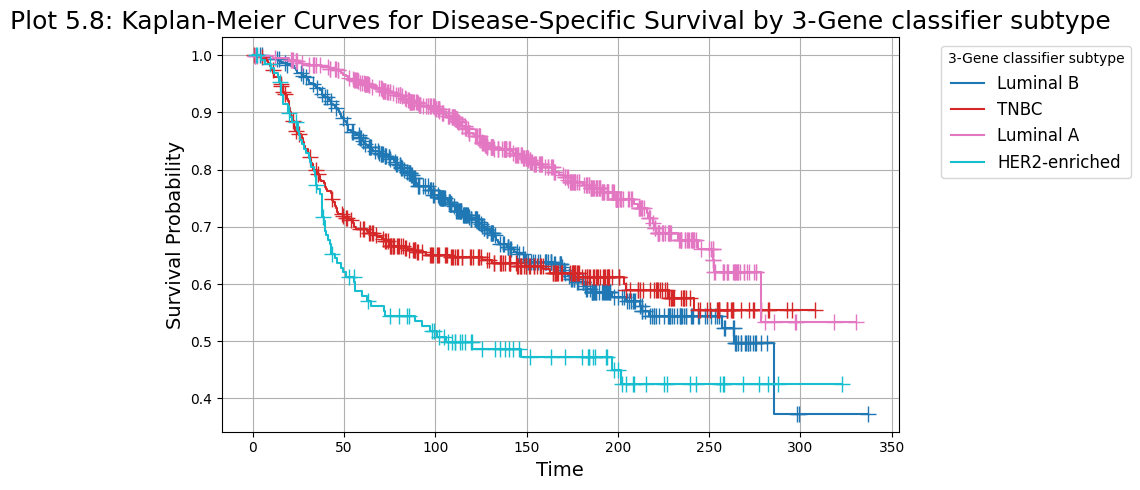

In [78]:
plot_kaplan_meier_by_group(
    df_group=df_oss,
    duration_col='Overall Survival (Months)',
    event_col='event_DSS',
    group_col='3-Gene classifier subtype',
    title= 'Plot 5.8: Kaplan-Meier Curves for Disease-Specific Survival by 3-Gene classifier subtype',
    group_name_map= {i: class_name for i, class_name in enumerate(encoders['3-Gene classifier subtype'].classes_)}
)

DSS curves mirrored RFS trends, but the TNBC-Luminal B crossover point was delayed to 170 months, with TNBC showing significantly lower survival rates before this intersection. HER2+ enriched remained the poorest performer, exhibiting a steep early decline without substantial recovery in later stages.

### 5.1.4 Kaplan-Meier Survival Curves for 'Inferred Menopausal State' Groups

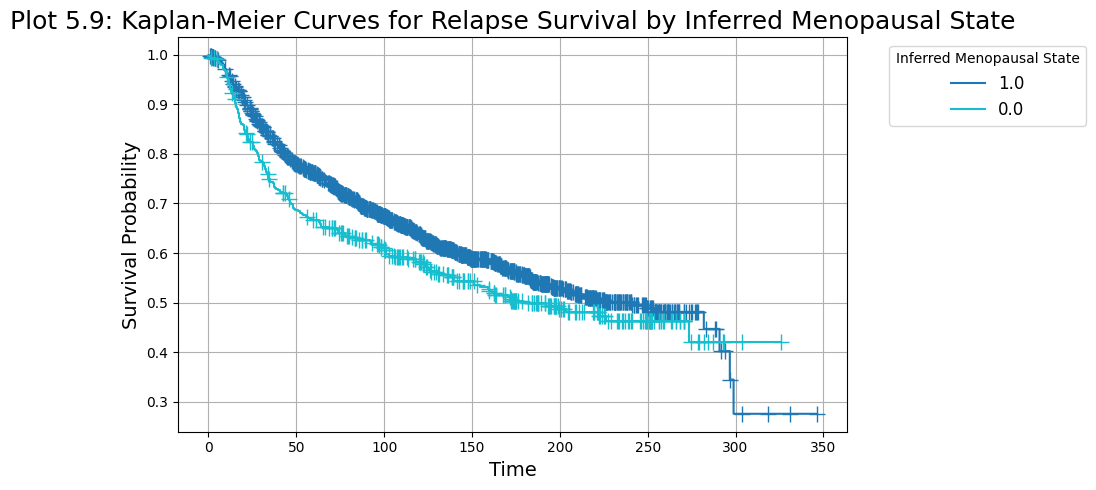

In [79]:
plot_kaplan_meier_by_group(
    df_group=df_rfs,
    duration_col='Relapse Free Status (Months)',
    event_col='Relapse Free Status',
    group_col='Inferred Menopausal State',
    title= 'Plot 5.9: Kaplan-Meier Curves for Relapse Survival by Inferred Menopausal State'
)

In [80]:
results = multivariate_logrank_test(
    df_rfs['Relapse Free Status (Months)'],
    df_rfs['Relapse Free Status'],
    df_rfs['Inferred Menopausal State']
)

results.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         429.68 <0.005    314.65

he KM curve for RFS shows that premenopausal patients have significantly lower relapse-free survival compared to postmenopausal patients (log-rank p < 0.05),suggesting that younger age, as approximated by menopausal status, may be associated with high relapse risk.**

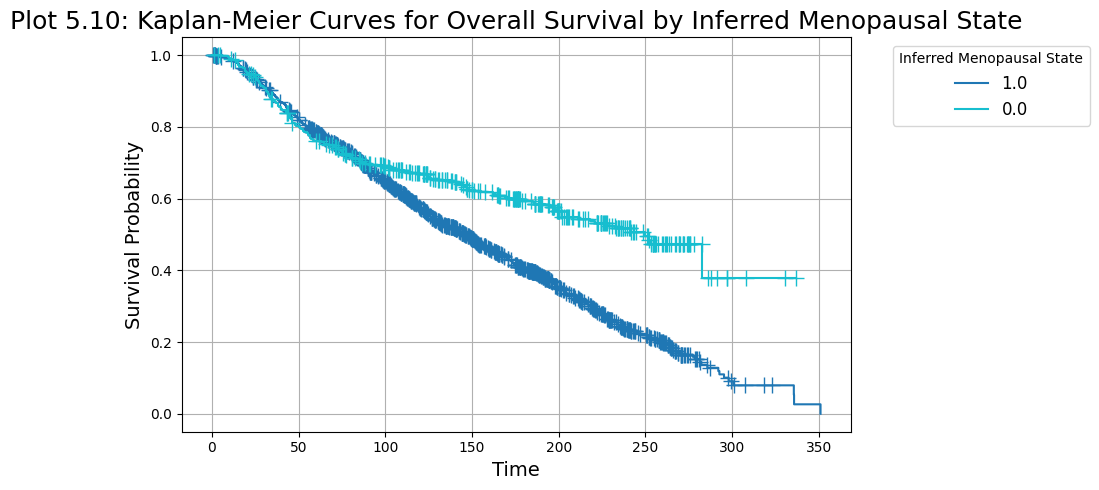

In [81]:
plot_kaplan_meier_by_group(
    df_group=df_oss,
    duration_col='Overall Survival (Months)',
    event_col='Overall Survival Status',
    group_col='Inferred Menopausal State',
    title= 'Plot 5.10: Kaplan-Meier Curves for Overall Survival by Inferred Menopausal State')


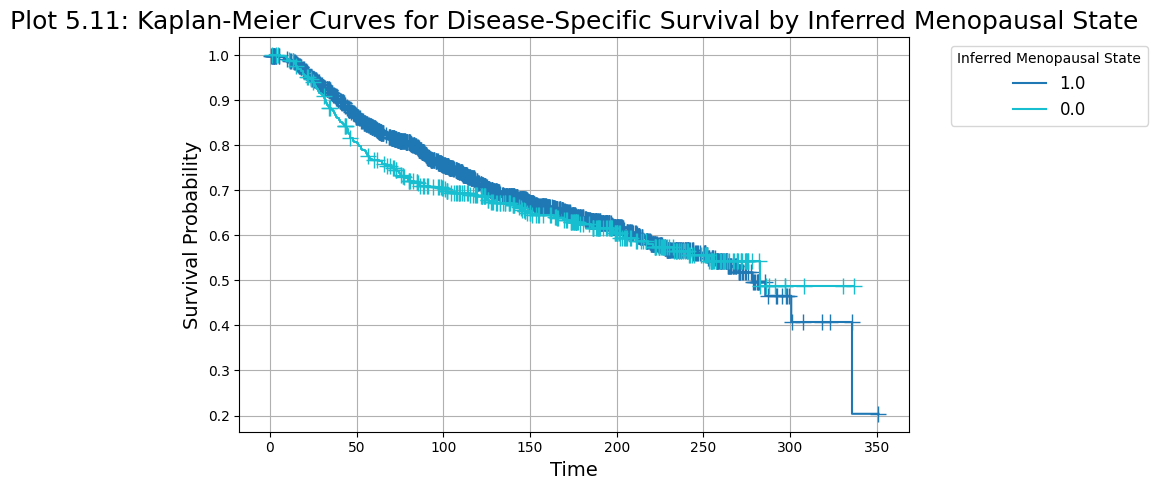

In [82]:
plot_kaplan_meier_by_group(
    df_group=df_oss,
    duration_col='Overall Survival (Months)',
    event_col='event_DSS',
    group_col='Inferred Menopausal State',
    title= 'Plot 5.11: Kaplan-Meier Curves for Disease-Specific Survival by Inferred Menopausal State')

In [83]:
results = multivariate_logrank_test(
    df_oss['Overall Survival (Months)'],
    df_oss['event_DSS'],
    df_oss['Inferred Menopausal State']
)

results.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         269.78 <0.005    198.97

The KM curves for OS and DSS by Inferred Menopausal State reveal notable differences in survival dynamics.

In the first 100 months, permenopausal patients show lower DSS compared to postmenopausal patients,while OS curves remain nearly identical between the two groups. This suggests a higher risk of breast cancer-specific mortality in younger patients during early follow-up.

After 100 months, the DSS curves converge, indicating comparable long-term disease-specific survival. Meanwhile, the OS curve for postmenopausal patients continues to decline linearly, likely reflecting age-related non-cancer mortality. In contrast, the OS curve for premenopausal patients flattens markedly after 100 months, suggesting reduced late mortality risk.The closer alignment between OS and DSS among premenopausal patients implies that their overall survival is predominantly determined by breast cancer, whereas for postmenopausal patients, other health factors may contribute significantly to all-cause mortality.

# 6 Survival Prediction Models Based on Cox Regression and Random Survival Forests

## 6.1 Data Preprocessing

### 6.1.1 Feture Selection

In [84]:
df_cpi = df_rfs.drop(columns=["Primary Tumor Laterality",
                              'Tumor Stage','Nottingham prognostic index',
                              'Cohort','Integrative Cluster',
                              '3-Gene classifier subtype']).dropna().copy()

df_cps= df_oss.drop(columns=["Primary Tumor Laterality",
                             'Tumor Stage','Cohort',
                             'Integrative Cluster',
                             'Nottingham prognostic index',
                             '3-Gene classifier subtype']).copy()

We decided to remove some columns:

**1. Primary Tumor Laterality**<br>
kaplan-Meier survival analysis indicated no significant difference in survival based on tumor laterality(left vs. right breast). Therefore, this feature was deemed to have minimal predictive value and was exluded.

**2. Neoplasm Histologic Index**<br>
The index is calculated using the formula:

**NPI = [0.2 x S] + N + G**<br>
**Where:**

**S is the size of the index lesion in centimetres**<br>
**N is the node status: 0 nodes = 1, 1-3 nodes = 2, >3 nodes = 3**<br>
**G is the grade of tumour: Grade I =1, Grade II =2, Grade III =3**<br>

Nottingham Prognostic Index (NPI) compresses key prognostic information—such as tumor size, lymph node involvement, and histologic grade—into simplified scores, which can obscure the true, nuanced effects of these variables on survival. By retaining the original, more granular variables, we preserve essential clinical detail and enable more flexible and precise modeling of their individual and potentially non-linear contributions to patient outcomes.

**3. Tumor Stage**<br>
Based on the previously developed predictive model, we decided to exclude Tumor Stage because it has a high proportion of missing values and an imbalanced distribution of stages, with particularly unclear boundaries between Stage II and III, making it difficult for the model to reliably capture its information. Additionally, Tumor Stage is a composite variable derived from Tumor Size, lymph node status, and tumor grade, which introduces redundancy and multicollinearity. Retaining these individual components improves the model’s interpretability and predictive performance while more precisely reflecting variations in survival risk.

**4.3-Gene Classifier Subtype**<br>
We excluded the 3-Gene Classifier Subtype because it is entirely derived from HER2 Status, PR, and ER, all of which are already included as separate variables in our model. Including the classifier alongside its component variables would introduce redundancy and multicollinearity, which can distort model estimates and reduce interpretability. Furthermore, retaining the individual biomarkers allows for a more flexible and nuanced analysis of their individual and interactive effects on survival outcomes. In contrast, the PAM50 + Claudin-low subtype captures broader intrinsic biological characteristics that are not fully represented by HER2, PR, and ER, making it a more informative and complementary feature for modeling.

## 6.1.2 Converting categorical columns into dummy variables

In [85]:
df_coxa=pd.get_dummies(df_cpi,
                        columns=['Neoplasm Histologic Grade',
                                 'Pam50 + Claudin-low subtype',
                                 'Oncotree Code_merged',
                                 'Cellularity'],
                         drop_first=True)

df_coxb=pd.get_dummies(df_cps,
                        columns=['Neoplasm Histologic Grade',
                                 'Pam50 + Claudin-low subtype',
                                 'Oncotree Code_merged',
                                 'Cellularity'],
                         drop_first=True)

## 6.2 Survival Analysis for Relapse-Free Survival

### 6.2.1 COX Regression Model

**Defining data standardization functions**

We defined two data standardization functions: one for preprocessing data to test the proportional hazards assumption, and another for building the Cox regression model, which includes splitting the dataset into training and testing sets and applying standardization.

In [86]:
from lifelines import CoxPHFitter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from lifelines.utils import concordance_index
def scalera(df, event_col, duration_col):
    scaler = StandardScaler()
    # Standardize features (mean=0, std=1)
    scaler = StandardScaler()
    X_df= df.drop(columns=[event_col,duration_col]).copy()
    df_scaled= pd.DataFrame(scaler.fit_transform(X_df),
                             columns=X_df.columns,
                             index=X_df.index)
    df_scaled[duration_col] = df[duration_col].values
    df_scaled[event_col] = df[event_col].values
    return df_scaled

def scalerb(df, event_col, duration_col):
    train_data0, test_data0 = train_test_split(df,
                                         test_size=0.25,
                                         random_state=77)
    # Drop duration and event columns to get only covariates for scaling
    X_train = train_data0.drop(columns=[event_col,duration_col]).copy()
    X_test = test_data0.drop(columns=[event_col,duration_col]).copy()

    scaler = StandardScaler()
    train_scaled= pd.DataFrame(scaler.fit_transform(X_train),
                             columns=X_train.columns,
                             index=X_train.index)
    test_scaled= pd.DataFrame(scaler.transform(X_test),
                             columns=X_test.columns,
                             index=X_test.index)

    # Add back the duration and event columns without scaling
    train_scaled[duration_col] = train_data0[duration_col].values
    train_scaled[event_col] = train_data0[event_col].values
    test_scaled[duration_col] = test_data0[duration_col].values
    test_scaled[event_col] = test_data0[event_col].values

    return train_scaled, test_scaled

**Identifying variables that violate the proportional hazards assumption**

The Cox regression model assumes that the hazard ratios for each variable remain constant over time. Therefore, before building the Cox model, we need to first identify variables that violate this assumption.

In [87]:
df_coxa1= scalera(df=df_coxa,
                   event_col='Relapse Free Status',
                   duration_col='Relapse Free Status (Months)')

# Initialize Cox Proportional Hazards fitter
cph = CoxPHFitter()

# Fit the Cox model on the training data

cpha1= cph.fit(df_coxa1, duration_col='Relapse Free Status (Months)',
               event_col='Relapse Free Status')

After building the Cox regression model, we use the proportional_hazard_test function to identify variables that violate the proportional hazards assumption. To address these violations, we plan to add time interaction terms to the offending variables. However, including too many interaction terms may compromise model stability. Therefore, in our function get_significant_ph_violations, we only select variables that both violate the proportional hazards assumption (p < 0.05) and have a potential impact on the event (model_p < 0.1). We relax the significance threshold for the variable’s effect from 0.05 to 0.1 to capture variables that, although not strongly associated with the event initially, may become significant after introducing time interaction terms—especially those that severely violate the proportional hazards assumption.

In [88]:
from lifelines.statistics import proportional_hazard_test

def get_significant_ph_violations(cph, df, duration_col, event_col):
    # p-values of model coefficients
    model_p = cph.summary["p"]

    # Proportional hazards test
    ph_test = proportional_hazard_test(cph, df, time_transform="rank",
                                       duration_col=duration_col,
                                       event_col=event_col)
    ph_p = ph_test.summary["p"]

    # Variables that meet both conditions
    valid_vars = (model_p < 0.1) & (ph_p < 0.05)

    result = pd.DataFrame({
        "p_model": model_p[valid_vars],
        "p_PHtest": ph_p[valid_vars]
    })

    return result

In [89]:
result= get_significant_ph_violations(cph=cpha1,
                                      df= df_coxa1,
                                      duration_col='Relapse Free Status (Months)',
                                      event_col='Relapse Free Status')
print(result)

                                  p_model  p_PHtest
Pam50 + Claudin-low subtype_3.0  0.053559  0.020726
Pam50 + Claudin-low subtype_6.0  0.031753  0.007939


The results indicate that two variables—'Pam50 + Claudin-low subtype_3.0' and 'Pam50 + Claudin-low subtype_6.0'—violate the proportional hazards assumption.

**Handling Variables that Violate the Proportional Hazards Assumption**

For variables that violate the proportional hazards assumption of the Cox model, it is common practice to model their time-varying effects by introducing an interaction term between the variable and time (e.g., the variable multiplied by log(Time)). However, directly including such interaction terms can lead to strong collinearity between the variable and its interaction term, which may compromise the stability and interpretability of the model estimates. To mitigate this issue, the time variable is usually centered by subtracting its mean from log(Time), and then this centered term is multiplied by the variable to form the interaction term.
And we defined the add_log function to create time interaction terms for variables that violate the proportional hazards assumption.

In [90]:
from sklearn.linear_model import LinearRegression
import numpy as np

def add_log(df1, t_col, duration_col, event_col):
    # Copy dataframe and filter out rows with non-positive durations
    df2 = df1[df1[duration_col] > 0].copy()

    # Calculate log of the duration (time) column
    df2['log_time'] = np.log(df2[duration_col])- np.log(df2[duration_col]).mean()

    for col in t_col:
        # Create interaction term: variable × log_time
        df2[f'{col}_logtime'] = df2[col] * df2['log_time']

        # Drop the original non-orthogonal interaction term
    df2= df2.drop(columns=['log_time'])

    # Return the dataframe with new orthogonalized interaction columns added
    return df2

In [91]:
df_coxa2= add_log(df1=df_coxa,
                    t_col=['Pam50 + Claudin-low subtype_6.0',
                          'Pam50 + Claudin-low subtype_3.0'],
                    duration_col='Relapse Free Status (Months)',
                    event_col='Relapse Free Status')

After adding the time interaction terms, we proceed with formal modeling using the Cox proportional hazards model.
After splitting the dataset into training and testing sets, we apply backward stepwise regression on the training set to select significant variables. We then build the Cox proportional hazards model using the selected variables and output the model's summary information.

**Spliting the data into train set and test set**

In [92]:
train_data, test_data= scalerb(df=df_coxa2,
                               event_col='Relapse Free Status',
                               duration_col='Relapse Free Status (Months)')

**Training the Model on the Training Set**

We defined a backward_elimination function that fits a Cox regression model on the training set and uses backward stepwise regression to select significant variables.

In [93]:
def backward_elimination(df, duration_col, event_col, strata=None):
    if strata is None:
        strata = []
    df = df.copy()
    while True:
        cph = CoxPHFitter()
        if strata:
            cph.fit(df, duration_col=duration_col, event_col=event_col, strata=strata)
        else:
            cph.fit(df, duration_col=duration_col, event_col=event_col)
        p_values = cph.summary['p']
        worst_p = p_values.max()
        if worst_p > 0.05:
            worst_feature = p_values.idxmax()
            print(f"Removing: {worst_feature} (p={worst_p:.4f})")
            df = df.drop(columns=[worst_feature])
        else:
            break
    return cph, df

In [94]:
cpha2, train_data= backward_elimination(df=train_data,
                             duration_col="Relapse Free Status (Months)",
                             event_col="Relapse Free Status")
cpha2.print_summary()

Removing: Age at Diagnosis (p=0.9231)
Removing: Pam50 + Claudin-low subtype_4.0 (p=0.9201)
Removing: Pam50 + Claudin-low subtype_5.0 (p=0.8286)
Removing: HER2 Status (p=0.8488)
Removing: ER Status (p=0.7604)
Removing: Cellularity_2.0 (p=0.7083)
Removing: Type of Breast Surgery (p=0.6827)
Removing: Cellularity_1.0 (p=0.6244)
Removing: Hormone Therapy (p=0.5836)
Removing: Pam50 + Claudin-low subtype_6.0 (p=0.4319)
Removing: Mutation Count (p=0.4281)
Removing: Oncotree Code_merged_4.0 (p=0.3694)
Removing: Oncotree Code_merged_2.0 (p=0.3424)
Removing: Oncotree Code_merged_1.0 (p=0.4920)
Removing: Oncotree Code_merged_3.0 (p=0.2529)
Removing: PR Status (p=0.1831)
Removing: Chemotherapy (p=0.0854)


<lifelines.CoxPHFitter: fitted with 1452 total observations, 865 right-censored observations>
             duration col = 'Relapse Free Status (Months)'
                event col = 'Relapse Free Status'
      baseline estimation = breslow
   number of observations = 1452
number of events observed = 587
   partial log-likelihood = -3689.81
         time fit was run = 2025-08-17 21:47:29 UTC

---
                                         coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                                
Inferred Menopausal State               -0.10      0.90      0.04           -0.18           -0.02                0.83                0.98
Lymph nodes examined positive            0.23      1.25      0.03            0.16            0.29                1.18                1.34
Radio Therapy                           -0.12      0.89      0.04           -0.20           -0.03                0.82                0.97
Tumor Size                               0.09      1.10      0.04            0.02            0.17                1.02                1.18
Neoplasm Histologic Grade_2.0            0.18      1.20      0.08            0.02            0.34                1.02                1.41
Neoplasm Histologic Grade_3.0            0.24      1.28      0.09            0.08            0.41                1.08                1.51
Pam50 + Claudin-low subtype_1.0          0.09      1.09      0.04            0.00            0.17                1.00                1.19
Pam50 + Claudin-low subtype_2.0         -0.15      0.86      0.06           -0.26           -0.04                0.77                0.96
Pam50 + Claudin-low subtype_3.0          0.15      1.16      0.05            0.04            0.26                1.04                1.29
Pam50 + Claudin-low subtype_6.0_logtime -0.66      0.52      0.05           -0.75           -0.57                0.47                0.56
Pam50 + Claudin-low subtype_3.0_logtime -0.88      0.42      0.05           -0.98           -0.78                0.38                0.46

                                         cmp to      z      p  -log2(p)
covariate                                                              
Inferred Menopausal State                  0.00  -2.52   0.01      6.40
Lymph nodes examined positive              0.00   7.11 <0.005     39.65
Radio Therapy                              0.00  -2.76   0.01      7.46
Tumor Size                                 0.00   2.57   0.01      6.63
Neoplasm Histologic Grade_2.0              0.00   2.15   0.03      4.97
Neoplasm Histologic Grade_3.0              0.00   2.87 <0.005      7.93
Pam50 + Claudin-low subtype_1.0            0.00   1.99   0.05      4.43
Pam50 + Claudin-low subtype_2.0            0.00  -2.66   0.01      7.00
Pam50 + Claudin-low subtype_3.0            0.00   2.74   0.01      7.35
Pam50 + Claudin-low subtype_6.0_logtime    0.00 -14.70 <0.005    160.13
Pam50 + Claudin-low subtype_3.0_logtime    0.00 -17.54 <0.005    226.46
---
Concordance = 0.78
Partial AIC = 7401.61
log-likelihood ratio test = 609.82 on 11 df
-log2(p) of ll-ratio test = 408.45

To aid interpretation, we displayed the original category names corresponding to some dummy variables.

In [95]:
col = 'Type of Breast Surgery'
le = encoders[col]

for i, cls in enumerate(le.classes_):
    print(f"{i} → {cls}")

print("................")

col = 'Pam50 + Claudin-low subtype'
le = encoders[col]

for i, cls in enumerate(le.classes_):
    print(f"{i} → {cls}")

0 → Breast Conserving
1 → Mastectomy
................
0 → Basal
1 → Her2
2 → LumA
3 → LumB
4 → NC
5 → Normal
6 → claudin-low


**Testing the model on test set**

In [96]:
test_data = test_data[train_data.columns].copy()
c_index = concordance_index(test_data["Relapse Free Status (Months)"],
                            -cpha2.predict_partial_hazard(test_data))
print("C-index on test set:", c_index)

C-index on test set: 0.7024027518696627


From the Cox regression model summary, the number of positive lymph nodes has the most significant impact on relapse risk, with a hazard ratio (HR = 1.25) indicating that the more positive lymph nodes, the higher the risk of relapse. Tumor size, and histologic tumor grade also show significant positive associations with risk, suggesting that these clinical indicators are important prognostic factors. Additionally, certain PAM50 subtypes (such as LumA) exhibit lower risk, while LumB and Claudin-low subtypes demonstrate significant time-dependent effects in the time interaction terms, indicating that the relapse risk of these molecular subtypes changes over time. The model effectively captures this non-proportional hazards effect through the inclusion of time interaction terms.

The model achieves a C-index of 0.77 on the training set and 0.70 on the test set, demonstrating good discriminative ability and strong generalizability. The overall significant log-likelihood ratio test further confirms the statistical significance of the included variables in predicting relapse risk, and the addition of time interaction terms improves the model’s fit to the complex survival process.

### 6.2.2 Random Survival Forest Model

To provide a comparison, we also constructed a Random Survival Forest (RSF) model. To reduce the risk of overfitting, we first applied backward selection based on the initial Cox regression model (without time interaction terms) to identify statistically significant predictors. These selected variables were then used as inputs for the RSF model.

In [97]:
from sklearn.model_selection import train_test_split
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv
import pandas as pd

def rsf_evaluate(cph, df, duration_col, event_col, test_size=0.3, random_state=42):
    # 1. Extract variable names from the CoxPH model
    variable_names = cph.params_.index.tolist()

    # 2. Select these variables plus survival columns from df, excluding specified cols
    feature_cols = [col for col in variable_names]
    df_selected = df[feature_cols + [event_col, duration_col]].copy()

    # 3. Create structured array for survival analysis (required by scikit-survival)
    y_structured = Surv.from_dataframe(event_col, duration_col, df_selected)

    # 4. Prepare feature matrix by dropping survival columns
    X = df_selected.drop(columns=[duration_col, event_col])

    # 5. Split train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_structured, test_size=test_size, random_state=random_state)

    # 6. Initialize and train RSF
    rsf = RandomSurvivalForest(
        n_estimators=100,
        min_samples_split=10,
        min_samples_leaf=15,
        max_features="sqrt",
        n_jobs=-1,
        random_state=random_state
    )
    rsf.fit(X_train, y_train)

    # 7. Evaluate concordance index
    cindex_train = rsf.score(X_train, y_train)
    cindex_test = rsf.score(X_test, y_test)
    print(f"Concordance Index on train data: {cindex_train:.3f}")
    print(f"Concordance Index on test data: {cindex_test:.3f}")

   # 8. Permutation importance
    result = permutation_importance(rsf, X_test, y_test, n_repeats=10,
                                    random_state=random_state, n_jobs=-1)

    feature_importance_df = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': result.importances_mean
    }).sort_values(by='Importance', ascending=False)  # ascending for horizontal barplot


    # 9. Visualization
    plt.figure(figsize=(8, 6))
    sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='Blues_d')
    plt.title('Feature Importance (Permutation on Test Set)', fontsize=13)
    plt.xlabel('Mean Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
    return feature_importance_df

Removing: Oncotree Code_merged_4.0 (p=0.9253)
Removing: ER Status (p=0.9110)
Removing: Cellularity_1.0 (p=0.8340)
Removing: Mutation Count (p=0.6645)
Removing: Pam50 + Claudin-low subtype_2.0 (p=0.5356)
Removing: Pam50 + Claudin-low subtype_4.0 (p=0.4327)
Removing: Radio Therapy (p=0.2299)
Removing: Age at Diagnosis (p=0.2170)
Removing: Inferred Menopausal State (p=0.2916)
Removing: PR Status (p=0.1116)
Removing: Pam50 + Claudin-low subtype_5.0 (p=0.0869)
Removing: Pam50 + Claudin-low subtype_1.0 (p=0.1321)
Removing: Oncotree Code_merged_1.0 (p=0.0667)
Removing: Oncotree Code_merged_3.0 (p=0.3545)
Removing: Oncotree Code_merged_2.0 (p=0.2039)
Removing: Cellularity_2.0 (p=0.0542)
Concordance Index on train data: 0.709
Concordance Index on test data: 0.669


/tmp/ipython-input-1855089937.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='Blues_d')


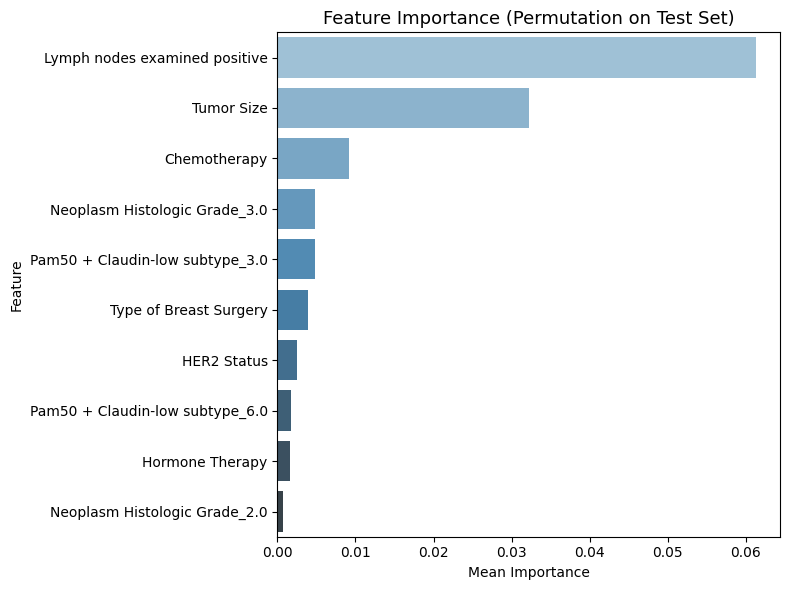

In [98]:
cpharf, df_coxa= backward_elimination(df=df_coxa,
                             duration_col="Relapse Free Status (Months)",
                             event_col="Relapse Free Status")
feature_importance= rsf_evaluate(cph= cpharf, df=df_coxa,
                                 event_col= "Relapse Free Status",
                                 duration_col="Relapse Free Status (Months)",
                                 test_size=0.3, random_state=42)

According to the feature importance analysis of the Random Survival Forest (RSF) model, the number of positive lymph nodes shows the highest importance score (0.061), highlighting its crucial role in predicting breast cancer recurrence risk. This finding aligns with the results of the Cox regression model, further validating its strong prognostic value. The tumor size follows with an importance score of 0.032, indicating that larger tumors are associated with a higher risk of recurrence—consistent with clinical understanding.

In contrast, other variables such as chemotherapy, tumor grade, and molecular subtypes have relatively low importance scores, providing limited contribution to the model’s performance. Notably, the molecular subtypes “Pam50 + Claudin-low subtype_3.0” and “_6.0” show low importance in the RSF model, whereas they were identified as significant in the Cox model due to their interaction with time. This suggests that RSF may fail to capture time-dependent effects, highlighting the difference between models in handling non-proportional hazards.

## 6.3 Survival Analysis for Overall Survival

### 6.3.1 Cox Regression Model

**Data preprocessing**

In [99]:
df_coxb1=df_coxb.drop(columns=['event_DSS']).dropna().copy()

df_coxb2= scalera(df=df_coxb1,
                   event_col='Overall Survival Status',
                   duration_col='Overall Survival (Months)')

**Identifying variables that violate the proportional hazards assumption**

In [100]:
# Initialize Cox Proportional Hazards fitter
cph = CoxPHFitter()
# Fit the Cox model on the training data

cphb1= cph.fit(df_coxb2,
               duration_col='Overall Survival (Months)',
               event_col='Overall Survival Status')
result= get_significant_ph_violations(cph=cphb1,
                                      df=df_coxb2,
                                      duration_col='Overall Survival (Months)',
                                      event_col='Overall Survival Status')
print(result)

                                    p_model  p_PHtest
Age at Diagnosis               5.886268e-40  0.000734
ER Status                      3.931593e-02  0.009260
Neoplasm Histologic Grade_3.0  4.954746e-02  0.041082
Oncotree Code_merged_2.0       9.692931e-02  0.043714


**Handling variables that violate the proportional hazards assumption**

In [101]:
df_coxb2= add_log(df1=df_coxb1,
                    t_col=['Neoplasm Histologic Grade_3.0',
                           'Age at Diagnosis',
                           'ER Status'],
                    duration_col='Overall Survival (Months)',
                    event_col='Overall Survival Status')

**Spliting data and training the model**

In [102]:
train_data, test_data= scalerb(df=df_coxb2,
                               event_col='Overall Survival Status',
                               duration_col='Overall Survival (Months)')


cphb2, train_data1= backward_elimination(df=train_data,
                             duration_col='Overall Survival (Months)',
                             event_col='Overall Survival Status')
cphb2.print_summary()

Removing: Oncotree Code_merged_2.0 (p=0.9239)
Removing: Age at Diagnosis (p=0.9145)
Removing: Pam50 + Claudin-low subtype_6.0 (p=0.8415)
Removing: Type of Breast Surgery (p=0.7646)
Removing: Cellularity_2.0 (p=0.7536)
Removing: Cellularity_1.0 (p=0.7477)
Removing: Tumor Size (p=0.5374)
Removing: Neoplasm Histologic Grade_2.0 (p=0.4603)
Removing: Neoplasm Histologic Grade_3.0 (p=0.3491)
Removing: Hormone Therapy (p=0.2249)
Removing: PR Status (p=0.2224)
Removing: Oncotree Code_merged_4.0 (p=0.2345)
Removing: Lymph nodes examined positive (p=0.1467)
Removing: Pam50 + Claudin-low subtype_5.0 (p=0.1353)
Removing: ER Status (p=0.2837)
Removing: HER2 Status (p=0.1473)
Removing: Pam50 + Claudin-low subtype_4.0 (p=0.1059)
Removing: Pam50 + Claudin-low subtype_2.0 (p=0.1287)
Removing: Pam50 + Claudin-low subtype_3.0 (p=0.4267)
Removing: Oncotree Code_merged_1.0 (p=0.0624)
Removing: Oncotree Code_merged_3.0 (p=0.3843)


<lifelines.CoxPHFitter: fitted with 1454 total observations, 611 right-censored observations>
             duration col = 'Overall Survival (Months)'
                event col = 'Overall Survival Status'
      baseline estimation = breslow
   number of observations = 1454
number of events observed = 843
   partial log-likelihood = -3954.64
         time fit was run = 2025-08-17 21:49:09 UTC

---
                                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                              
Chemotherapy                           0.09      1.10      0.04            0.02            0.17                1.02                1.19
Inferred Menopausal State              0.41      1.51      0.05            0.32            0.50                1.38                1.65
Mutation Count                         0.12      1.13      0.04            0.05            0.19                1.06                1.21
Radio Therapy                         -0.09      0.92      0.04           -0.16           -0.02                0.85                0.98
Pam50 + Claudin-low subtype_1.0        0.13      1.14      0.03            0.07            0.20                1.07                1.22
Neoplasm Histologic Grade_3.0_logtime -0.89      0.41      0.07           -1.02           -0.75                0.36                0.47
Age at Diagnosis_logtime              -5.62      0.00      0.19           -5.99           -5.24                0.00                0.01
ER Status_logtime                     -0.40      0.67      0.08           -0.55           -0.24                0.58                0.78

                                       cmp to      z      p  -log2(p)
covariate                                                            
Chemotherapy                             0.00   2.42   0.02      6.02
Inferred Menopausal State                0.00   8.85 <0.005     60.02
Mutation Count                           0.00   3.49 <0.005     11.01
Radio Therapy                            0.00  -2.47   0.01      6.21
Pam50 + Claudin-low subtype_1.0          0.00   3.90 <0.005     13.31
Neoplasm Histologic Grade_3.0_logtime    0.00 -12.61 <0.005    118.75
Age at Diagnosis_logtime                 0.00 -29.00 <0.005    611.64
ER Status_logtime                        0.00  -5.06 <0.005     21.18
---
Concordance = 0.96
Partial AIC = 7925.29
log-likelihood ratio test = 3154.31 on 8 df
-log2(p) of ll-ratio test = inf

The initial model's extremely high C-index (up to 0.96).It might be due to the inclusion of multiple time interaction terms (e.g., Age at Diagnosis_logtime), which could have caused the model to rely too heavily on the time-varying effects of certain variables. This may have overshadowed the influence of other predictors, resulting in potential overfitting dominated by a single variable. The fact that the exp(coef) for Age at Diagnosis_logtime was close to zero suggests that the model might have become overly sensitive to time, leading to inflated performance on the training set but poor generalizability and limited interpretability.

Next, we use the check_assumptions function to examine how the proportional hazards assumption may be violated for the three variables and how their effects on risk might change over time.
This will help us identify which variables have time-varying effects and decide whether to model them using interaction terms or stratification.


   Bootstrapping lowess lines. May take a moment...

The ``p_value_threshold`` is set at 0.01. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 1939 total observations, 823 right-censored observations>
         test_name = proportional_hazard_test

---
                                      test_statistic      p  -log2(p)
Age at Diagnosis                km            994.24 <0.005    722.50
                                rank          320.02 <0.005    235.34
Cellularity_1.0                 km           2270.33 <0.005       inf
                                rank         2202.55 <0.005       inf
Cellularity_2.0                 km            486.38 <0.005    355.64
                                rank          448.32 <0.005    328.13
Chemotherapy                    km          56828.90 <0.005       inf
                                rank        53963.88 <0.005       inf
ER Status                       km           4612.20 <0.005       inf
                                rank         4438.59 <0.005       inf
HER2 Status                     km           4167.17 <0.005       inf
                                rank         4155.70 <0.005       inf
Hormone Therapy                 km           5412.59 <0.005       inf
                                rank         5439.04 <0.005       inf
Inferred Menopausal State       km             48.78 <0.005     38.35
                                rank          239.39 <0.005    176.96
Lymph nodes examined positive   km            174.24 <0.005    129.75
                                rank          106.80 <0.005     80.75
Mutation Count                  km           1562.59 <0.005       inf
                                rank         1449.25 <0.005       inf
Neoplasm Histologic Grade_2.0   km            876.00 <0.005    637.12
                                rank          841.96 <0.005    612.53
Neoplasm Histologic Grade_3.0   km            166.12 <0.005    123.85
                                rank          184.16 <0.005    136.94
Oncotree Code_merged_1.0        km            131.55 <0.005     98.75
                                rank           89.04 <0.005     67.81
Oncotree Code_merged_2.0        km            285.45 <0.005    210.32
                                rank          319.64 <0.005    235.06
Oncotree Code_merged_3.0        km            421.69 <0.005    308.88
                                rank          345.76 <0.005    253.96
Oncotree Code_merged_4.0        km            136.20 <0.005    102.13
                                rank          114.14 <0.005     86.09
PR Status                       km           7128.17 <0.005       inf
                                rank         6966.29 <0.005       inf
Pam50 + Claudin-low subtype_1.0 km            101.38 <0.005     76.80
                                rank           93.30 <0.005     70.91
Pam50 + Claudin-low subtype_2.0 km           2030.62 <0.005       inf
                                rank         2005.41 <0.005       inf
Pam50 + Claudin-low subtype_3.0 km            194.69 <0.005    144.57
                                rank          214.39 <0.005    158.85
Pam50 + Claudin-low subtype_4.0 km           1215.98 <0.005    882.60
                                rank         1164.59 <0.005    845.49
Pam50 + Claudin-low subtype_5.0 km            673.71 <0.005    491.01
                                rank          705.88 <0.005    514.25
Pam50 + Claudin-low subtype_6.0 km           3364.40 <0.005       inf
                                rank         3350.76 <0.005       inf
Radio Therapy                   km           9898.64 <0.005       inf
                                rank         9530.11 <0.005       inf
Tumor Size                      km        1287038.43 <0.005       inf
                                rank      1247113.67 <0.005       inf
Type of Breast Surgery          km          38895.64 <0.005       inf
                                rank        38239.57 <0.005       inf



1. Variable 'Age at Diagnosis' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'Age at Diagnosis' might be incorrect. That is,
there may be non-linear terms missing. The proportional hazard test used is very sensitive to
incorrect functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'Age at Diagnosis' using pd.cut, and then specify it in
`strata=['Age at Diagnosis', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


2. Variable 'ER Status' failed the non-proportional test: p-value is <5e-05.

   Advice: with so few unique values (only 2), you can include `strata=['ER Status', ...]` in the
call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May tak

[[<Axes: xlabel='rank-transformed time\n(p=0.0000)'>,
  <Axes: xlabel='km-transformed time\n(p=0.0000)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.0000)'>,
  <Axes: xlabel='km-transformed time\n(p=0.0000)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.0000)'>,
  <Axes: xlabel='km-transformed time\n(p=0.0000)'>]]

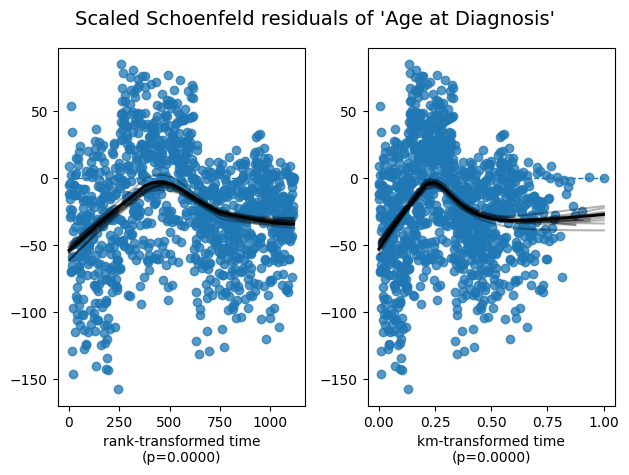

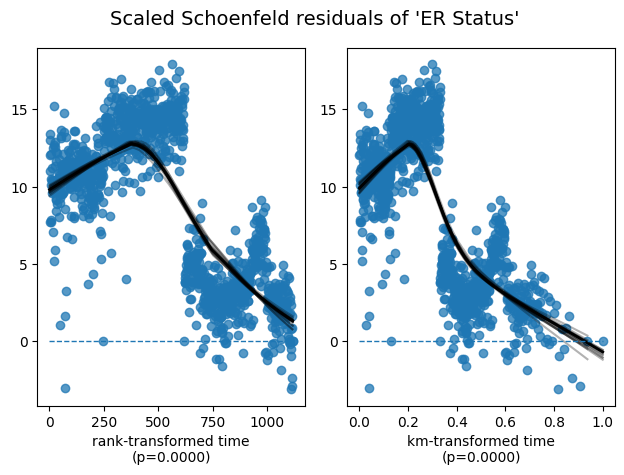

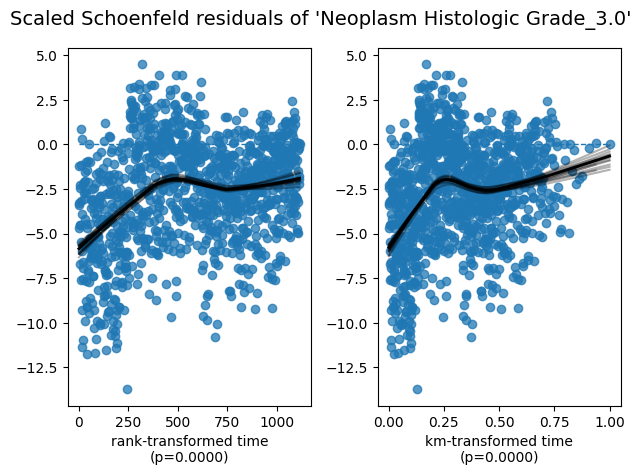

In [103]:
cphb1.check_assumptions(df_coxb1, show_plots=True, columns=['Age at Diagnosis', 'ER Status',
                                                            'Neoplasm Histologic Grade_3.0'])

From the Schoenfeld residual plots assessing the proportional hazards assumption, the variable Age at diagnosis shows a clear parabolic pattern, indicating a nonlinear time-varying effect and a significant violation of the PH assumption. The simple time interaction term fails to adequately capture this complex time dependency. The ER status residuals exhibit a non-monotonic pattern, with risk increasing then decreasing over time, also violating the PH assumption. In contrast, the residuals for Histologic Grade_3.0 fluctuate mildly and more linearly, showing only minor or no violations of the PH assumption.

Based on prior research showing that menopausal status can be strictly defined by the age cutoff of 50 and has strong clinical relevance, menopausal status is used to replace Age at diagnosis for stratification. This approach better aligns with the time-dependent nature of the variable and relaxes the PH assumption. ER status is also stratified, while Histologic Grade_3.0 retains its time interaction term to capture its relatively linear time-dependent effect.

**Training and testing the second model**

In [104]:
train_data2= train_data.drop(columns=['Age at Diagnosis','Age at Diagnosis_logtime','ER Status_logtime'])
test_data2= test_data.drop(columns=['Age at Diagnosis','Age at Diagnosis_logtime','ER Status_logtime'])

cphb3, train_data3= backward_elimination(df=train_data2,
                             duration_col='Overall Survival (Months)',
                             event_col='Overall Survival Status',
                                       strata=['Inferred Menopausal State','ER Status'])
cphb3.print_summary()

test_data3 = test_data2[train_data3.columns].copy()

c_index = concordance_index(test_data3["Overall Survival (Months)"],
                            -cphb3.predict_partial_hazard(test_data3))

print("C-index on test set:",c_index)

Removing: Pam50 + Claudin-low subtype_5.0 (p=0.8461)
Removing: Oncotree Code_merged_4.0 (p=0.8065)
Removing: Pam50 + Claudin-low subtype_2.0 (p=0.7596)
Removing: Cellularity_2.0 (p=0.7170)
Removing: Cellularity_1.0 (p=0.7470)
Removing: HER2 Status (p=0.5357)
Removing: Radio Therapy (p=0.4083)
Removing: PR Status (p=0.3706)
Removing: Neoplasm Histologic Grade_2.0 (p=0.2727)
Removing: Pam50 + Claudin-low subtype_4.0 (p=0.2247)
Removing: Chemotherapy (p=0.1515)
Removing: Pam50 + Claudin-low subtype_6.0 (p=0.1117)


<lifelines.CoxPHFitter: fitted with 1454 total observations, 611 right-censored observations>
             duration col = 'Overall Survival (Months)'
                event col = 'Overall Survival Status'
                   strata = ['Inferred Menopausal State', 'ER Status']
      baseline estimation = breslow
   number of observations = 1454
number of events observed = 843
   partial log-likelihood = -4154.80
         time fit was run = 2025-08-17 21:49:43 UTC

---
                                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                              
Type of Breast Surgery                 0.15      1.16      0.04            0.08            0.23                1.08                1.26
Hormone Therapy                        0.14      1.15      0.04            0.06            0.22                1.06                1.24
Lymph nodes examined positive          0.11      1.11      0.03            0.04            0.17                1.05                1.18
Mutation Count                         0.08      1.08      0.04            0.01            0.15                1.01                1.16
Tumor Size                             0.08      1.09      0.03            0.02            0.15                1.02                1.16
Neoplasm Histologic Grade_3.0          0.52      1.67      0.05            0.42            0.61                1.52                1.85
Pam50 + Claudin-low subtype_1.0        0.08      1.08      0.04            0.00            0.15                1.00                1.16
Pam50 + Claudin-low subtype_3.0        0.09      1.10      0.04            0.02            0.17                1.02                1.18
Oncotree Code_merged_1.0               0.19      1.21      0.09            0.01            0.37                1.01                1.45
Oncotree Code_merged_2.0               0.13      1.14      0.07            0.00            0.26                1.00                1.30
Oncotree Code_merged_3.0               0.17      1.19      0.07            0.02            0.32                1.02                1.37
Neoplasm Histologic Grade_3.0_logtime -2.06      0.13      0.08           -2.21           -1.91                0.11                0.15

                                       cmp to      z      p  -log2(p)
covariate                                                            
Type of Breast Surgery                   0.00   3.99 <0.005     13.86
Hormone Therapy                          0.00   3.42 <0.005     10.64
Lymph nodes examined positive            0.00   3.35 <0.005     10.28
Mutation Count                           0.00   2.17   0.03      5.06
Tumor Size                               0.00   2.54   0.01      6.48
Neoplasm Histologic Grade_3.0            0.00  10.21 <0.005     78.81
Pam50 + Claudin-low subtype_1.0          0.00   2.09   0.04      4.77
Pam50 + Claudin-low subtype_3.0          0.00   2.44   0.01      6.09
Oncotree Code_merged_1.0                 0.00   2.08   0.04      4.74
Oncotree Code_merged_2.0                 0.00   2.01   0.04      4.50
Oncotree Code_merged_3.0                 0.00   2.28   0.02      5.47
Neoplasm Histologic Grade_3.0_logtime    0.00 -26.63 <0.005    516.62
---
Concordance = 0.77
Partial AIC = 8333.60
log-likelihood ratio test = 1218.48 on 12 df
-log2(p) of ll-ratio test = 839.59

C-index on test set: 0.7670251201472443


Stratifying by Inferred Menopausal State and ER Status helped control for their time-dependent effects on the hazard ratio, resulting in a significant improvement in model performance.

Good model fit: The log-likelihood ratio test was highly significant (χ² = 1218.48, df = 12, p < 0.001, -log2(p) = 839.59), indicating that the overall model fits the data significantly better than the null model.

The concordance index (C-index) was 0.77, suggesting strong discriminative power in predicting patient survival ranking. The test set C-index was 0.767, closely matching the training set, demonstrating good generalizability and consistent performance across datasets.

Neoplasm Histologic Grade_3.0 was associated with a significantly increased hazard (HR = 1.67, p < 0.005), and its interaction with time (logtime) had a negative coefficient (-2.06, HR = 0.13, p < 0.005), suggesting that the risk associated with high-grade tumors declines over time. This may imply that high-grade tumors exert a stronger impact on mortality in the early phase of follow-up.

Hormone therapy and mastectomy appear to be associated with increased risk, likely because patients receiving these treatments tend to have more severe disease and inherently higher risks of death. The observed association reflects the underlying disease severity rather than the treatments themselves causing increased risk.

Lymph Nodes Examined Positive, Tumor Size, and Mutation Count all had hazard ratios greater than 1, showing an increasing risk trend, consistent with clinical understanding that greater tumor burden leads to lower survival.

Pam50 subtypes and Oncotree Code subtypes also contributed to risk prediction, suggesting that molecular subtype and genomic classification add predictive value to the model.

### 6.3.2 Random Survival Forest Model

Removing: Mutation Count (p=0.7933)
Removing: Pam50 + Claudin-low subtype_2.0 (p=0.7755)
Removing: Oncotree Code_merged_4.0 (p=0.6810)
Removing: Hormone Therapy (p=0.6105)
Removing: Pam50 + Claudin-low subtype_4.0 (p=0.4654)
Removing: Cellularity_1.0 (p=0.4053)
Removing: Cellularity_2.0 (p=0.5399)
Removing: PR Status (p=0.3623)
Removing: Neoplasm Histologic Grade_2.0 (p=0.2998)
Removing: Pam50 + Claudin-low subtype_1.0 (p=0.1156)
Removing: Type of Breast Surgery (p=0.0846)
Removing: Pam50 + Claudin-low subtype_5.0 (p=0.0790)
Removing: Oncotree Code_merged_1.0 (p=0.0534)
Removing: Oncotree Code_merged_2.0 (p=0.4288)
Removing: Oncotree Code_merged_3.0 (p=0.3090)
Removing: Pam50 + Claudin-low subtype_3.0 (p=0.0542)
Random Survival Forest:
Concordance Index on train data: 0.725
Concordance Index on test data: 0.684


/tmp/ipython-input-1855089937.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='Blues_d')


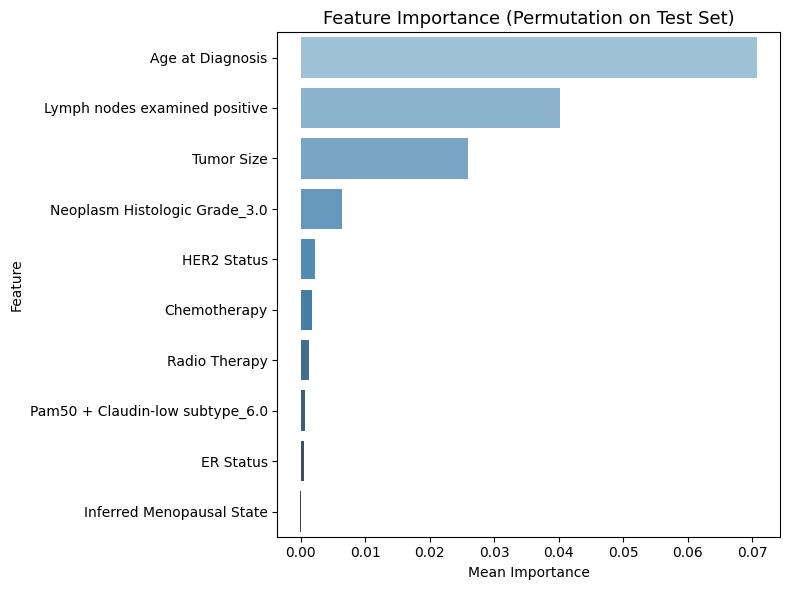

In [105]:
cphbrf, df_coxb2= backward_elimination(df=df_coxb1,
                             duration_col='Overall Survival (Months)',
                             event_col='Overall Survival Status')
print("Random Survival Forest:")
feature_importance= rsf_evaluate(cphbrf, df=df_coxb2, duration_col='Overall Survival (Months)',
                                 event_col='Overall Survival Status', test_size=0.3, random_state=42)

Model Performance:
The random forest model achieved a concordance index of 0.726 on the training set and 0.682 on the test set, indicating a certain ability to predict survival ranking but with some decline in generalization performance, suggesting a degree of overfitting. In comparison, the Cox model with stratification performed better (C-index close to 0.77). Therefore, although the random forest results are slightly inferior, they still hold some reference value.

Feature Importance:
In the random forest, Age at Diagnosis was the most important variable, indicating that age plays a dominant role in predicting breast cancer survival. Lymph nodes examined positive and Tumor Size also showed relatively high importance, consistent with clinical knowledge. In contrast, biomarkers such as HER2 Status, ER Status, and Radio Therapy had lower importance, suggesting their independent associations with the outcome might be weaker.

Notably, among the variables that showed significant impact on survival risk in the extended Cox model, except for Lymph nodes examined positive, Tumor Size, and Neoplasm Histologic Grade_3.0, other variables (such as Hormone Therapy, Type of Breast Surgery, Oncotree Code subtypes, Pam50 subtypes, etc.) were removed during the stepwise selection of the basic Cox model and thus did not enter the random forest model. This phenomenon may be explained by the following reasons:

Model form limitations: The basic Cox model does not include time interaction terms and thus cannot capture the time-dependent effects of some variables, leading to an underestimation of their risk contribution and exclusion during feature selection.

Weak main effects but strong interactions: Some variables (e.g., Oncotree subtypes or treatment modalities) may only affect survival outcomes during specific time periods or patient subgroups. Their main effects alone may be weak, making them difficult to detect as significant without modeling interactions.

Dilution of multi-category variables: Multi-category variables such as Oncotree Code and Pam50 are dispersed into multiple encoded features, which may have strong correlations or imbalance across categories, making them more likely to be excluded in stepwise regression.

## 6.4 Survival Analysis for disease-specific survival

## 6.4.1 COX Regression Model

**Data preprocessing**

In [106]:
df_coxc=df_coxb.drop(columns=['Overall Survival Status']).dropna().copy()

df_coxc1= scalera(df=df_coxc,event_col='event_DSS', duration_col='Overall Survival (Months)')

**Identifying variables that violate the proportional hazards assumption**

In [107]:
# Initialize Cox Proportional Hazards fitter
cph = CoxPHFitter()

# Fit the Cox model on the training data

cphc1= cph.fit(df_coxc1, duration_col='Overall Survival (Months)', event_col='event_DSS')
result= get_significant_ph_violations(cph=cphc1,
                                      df=df_coxc1,
                                      duration_col='Overall Survival (Months)',
                                      event_col='event_DSS')
print(result)

Empty DataFrame
Columns: [p_model, p_PHtest]
Index: []


The results show that all significant variables satisfy the proportional hazards assumption.

**Spliting the data and training the model**

In [108]:
train_data, test_data = scalerb(df=df_coxc,
                                event_col='event_DSS',
                                duration_col='Overall Survival (Months)')
cphc2, train_data1= backward_elimination(df=train_data,
                             duration_col="Overall Survival (Months)",
                             event_col="event_DSS")
cphc2.print_summary()

Removing: Oncotree Code_merged_4.0 (p=0.9726)
Removing: Hormone Therapy (p=0.9649)
Removing: ER Status (p=0.9119)
Removing: Cellularity_1.0 (p=0.8810)
Removing: Pam50 + Claudin-low subtype_5.0 (p=0.8687)
Removing: Mutation Count (p=0.7151)
Removing: Pam50 + Claudin-low subtype_4.0 (p=0.4728)
Removing: Cellularity_2.0 (p=0.4157)
Removing: Type of Breast Surgery (p=0.2804)
Removing: Pam50 + Claudin-low subtype_1.0 (p=0.1086)
Removing: Pam50 + Claudin-low subtype_3.0 (p=0.3281)
Removing: PR Status (p=0.1405)
Removing: Oncotree Code_merged_1.0 (p=0.0762)
Removing: Oncotree Code_merged_3.0 (p=0.4307)
Removing: Oncotree Code_merged_2.0 (p=0.1514)


<lifelines.CoxPHFitter: fitted with 1454 total observations, 983 right-censored observations>
             duration col = 'Overall Survival (Months)'
                event col = 'event_DSS'
      baseline estimation = breslow
   number of observations = 1454
number of events observed = 471
   partial log-likelihood = -3098.06
         time fit was run = 2025-08-17 21:51:23 UTC

---
                                 coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                        
Age at Diagnosis                 0.28      1.33      0.07            0.14            0.43                1.15                1.54
Chemotherapy                     0.15      1.17      0.05            0.05            0.26                1.05                1.30
HER2 Status                      0.12      1.13      0.04            0.04            0.20                1.04                1.23
Inferred Menopausal State       -0.15      0.86      0.07           -0.28           -0.01                0.75                0.99
Lymph nodes examined positive    0.23      1.26      0.03            0.17            0.29                1.19                1.34
Radio Therapy                   -0.10      0.90      0.05           -0.20           -0.01                0.82                0.99
Tumor Size                       0.18      1.20      0.04            0.11            0.25                1.12                1.28
Neoplasm Histologic Grade_2.0    0.20      1.23      0.10            0.01            0.40                1.01                1.49
Neoplasm Histologic Grade_3.0    0.29      1.33      0.10            0.09            0.48                1.10                1.62
Pam50 + Claudin-low subtype_2.0 -0.26      0.77      0.06           -0.37           -0.15                0.69                0.86
Pam50 + Claudin-low subtype_6.0 -0.14      0.87      0.05           -0.25           -0.04                0.78                0.96

                                 cmp to     z      p  -log2(p)
covariate                                                     
Age at Diagnosis                   0.00  3.78 <0.005     12.62
Chemotherapy                       0.00  2.90 <0.005      8.08
HER2 Status                        0.00  3.03 <0.005      8.68
Inferred Menopausal State          0.00 -2.16   0.03      5.01
Lymph nodes examined positive      0.00  7.92 <0.005     48.53
Radio Therapy                      0.00 -2.09   0.04      4.76
Tumor Size                         0.00  5.02 <0.005     20.91
Neoplasm Histologic Grade_2.0      0.00  2.10   0.04      4.82
Neoplasm Histologic Grade_3.0      0.00  2.87 <0.005      7.93
Pam50 + Claudin-low subtype_2.0    0.00 -4.54 <0.005     17.46
Pam50 + Claudin-low subtype_6.0    0.00 -2.70   0.01      7.18
---
Concordance = 0.71
Partial AIC = 6218.11
log-likelihood ratio test = 202.07 on 11 df
-log2(p) of ll-ratio test = 121.44

**Testing the model on the test set**

In [109]:
test_data1 = test_data[train_data1.columns].copy()

c_index = concordance_index(test_data1["Overall Survival (Months)"],
                            -cphc2.predict_partial_hazard(test_data))

print("C-index on test set:",c_index)

C-index on test set: 0.6331418930433893


The model achieved a C-index of 0.71 on the training set, indicating moderate-to-good predictive ability. However, the C-index dropped to 0.633 on the test set, suggesting some degree of overfitting and limited generalizability. The overall model fit was acceptable, with a partial log-likelihood of -3098.06, a partial AIC of 6218.11, and a statistically significant log-likelihood ratio test.

In terms of key predictors, Lymph nodes examined positive, Tumor Size, and Neoplasm Histologic Grade_3.0 were among the most significant clinical factors, strongly associated with increased risk. Age at Diagnosis also showed a high hazard ratio (HR=1.33), reinforcing its central role in breast cancer survival prediction. Tumor grade levels (Grade_2.0 and Grade_3.0) were significantly associated with worse prognosis, highlighting the importance of pathological characteristics in survival outcomes.

Treatment-related variables such as Chemotherapy (HR=1.17) and Radio Therapy (HR=0.90) were statistically significant but showed opposite directions, possibly reflecting clinical selection bias rather than therapeutic effect. Molecular subtypes like Pam50 subtype_2.0 and 6.0 showed protective associations (HR<1), whereas HER2 Status,had a hazard ratio higher than 1 (HR=1.33), showing association with increased risk.

### 6.4.2 Random Survival Forest

Concordance Index on train data: 0.778
Concordance Index on test data: 0.711


/tmp/ipython-input-1855089937.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='Blues_d')


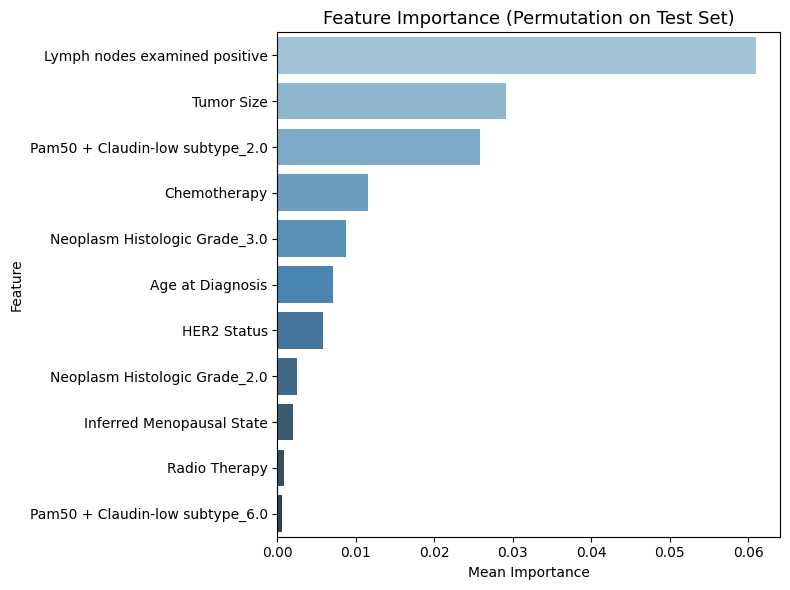

In [110]:
feature_importance= rsf_evaluate(cphc2, df=df_coxc,
                                 event_col="event_DSS",
                                 duration_col="Overall Survival (Months)",
                                 test_size=0.3, random_state=42)

Model Performance:
The Random Survival Forest model achieved a concordance index of 0.767 on the training set and 0.707 on the test set. Compared to the Cox model (C-index of 0.633 on the test set), the RSF model performs better, suggesting its superior ability to capture complex patterns and interactions in survival data. Its non-parametric nature allows for more flexible modeling of nonlinear relationships.

Variable Importance Analysis:
In the RSF model, Lymph nodes examined positive emerged as the most important predictor, followed by Tumor Size and Pam50 + Claudin-low subtype_2.0, which is consistent with key factors identified in the Cox model. Chemotherapy and HER2 Status were also ranked with notable importance, indicating that the RSF model effectively captures the influence of treatment-related variables even without explicit parametric assumptions.

However, Age at Diagnosis, which was highly significant in the Cox model (HR=1.33, p<0.005), ranked low in the RSF importance scores (only 0.0059). This suggests that in a nonlinear modeling context, its effect may be diminished or absorbed by other features or interactions. Similarly, Pam50 subtype_6.0 showed limited importance, possibly due to redundancy with other molecular features.

## 6.5 Summary of Variable Effects on Survival Endpoints and Comparative Analysis

In [111]:
# Extract and rename the exp(coef) columns from each Cox model summary
exp1 = cpha2.summary[["exp(coef)"]].rename(columns={"exp(coef)": "Recurrence-free survival(HR)"}).reset_index()
exp2 = cphb3.summary[["exp(coef)"]].rename(columns={"exp(coef)": "Overall Survival(HR)"}).reset_index()
exp3 = cphc2.summary[["exp(coef)"]].rename(columns={"exp(coef)": "Breast Cancer–Specific Survival(HR)"}).reset_index()

# Rename Importance column in feature importance dataframe for clarity
fi = feature_importance.rename(columns={"Importance": "Breast Cancer–Specific Survival(Importance)"}).reset_index()

# Standardize the covariate column name to 'Feature' for all DataFrames
exp1 = exp1.rename(columns={"covariate": "Feature"})
exp2 = exp2.rename(columns={"covariate": "Feature"})
exp3 = exp3.rename(columns={"covariate": "Feature"})

# Merge all three model summaries and feature importance on 'Feature'
merged = pd.merge(exp1, exp2, on="Feature", how="outer")
merged = pd.merge(merged, exp3, on="Feature", how="outer")
merged = pd.merge(merged, fi, on="Feature", how="outer")

# Sort the merged DataFrame by 'Feature' alphabetically
merged = merged.sort_values(by="Feature")

# Drop the 'index' column that came from reset_index() in feature importance
merged = merged.drop(columns=['index'])

# Add a new row for "ER Status" with a specific note in Overall Survival(HR)
new_row = {
    "Feature": "ER Status",
    "Overall Survival(HR)": "Time-varying and stratified"
}
merged = pd.concat([merged, pd.DataFrame([new_row])], ignore_index=True)

# Update the 'Overall Survival(HR)' value for the existing feature 'Age at Diagnosis'
merged.loc[merged['Feature'] == 'Age at Diagnosis', 'Overall Survival(HR)'] = "Time-varying and stratified"

# Fill missing values in the Importance column with 0 temporarily to avoid affecting gradient color scale
merged_filled = merged.copy()
merged_filled["Breast Cancer–Specific Survival(Importance)"] = merged_filled["Breast Cancer–Specific Survival(Importance)"].fillna(0)

# Define a function to color HR values:
# Red for HR > 1 (higher risk), green for HR < 1 (protective), no color for non-numeric or missing
def color_ratio(val):
    if pd.isnull(val):
        return ''
    try:
        val_float = float(val)
    except (ValueError, TypeError):
        return ''
    if val_float > 1:
        return 'color: red'
    else:
        return 'color: green'

# Apply styling:
# 1. Apply color_ratio function to the HR columns
# 2. Apply a blue gradient color scale to the Importance column (ignoring zeros visually)
# 3. Format the Importance column so that 0 values appear as empty strings (not showing 0)
styled = (
    merged_filled.style.map(
        color_ratio,
        subset=["Recurrence-free survival(HR)", "Overall Survival(HR)", "Breast Cancer–Specific Survival(HR)"]
    )
    .background_gradient(
        subset=["Breast Cancer–Specific Survival(Importance)"],
        cmap='Blues'
    )
    .format({"Breast Cancer–Specific Survival(Importance)": lambda x: '' if x == 0 else f"{x:.3f}"})
)

# Display the styled DataFrame
styled

,Feature,Recurrence-free survival(HR),Overall Survival(HR),Breast Cancer–Specific Survival(HR),Breast Cancer–Specific Survival(Importance)
0,Age at Diagnosis,nan,Time-varying and stratified,1.327308,0.007
1,Chemotherapy,nan,nan,1.167272,0.011
2,HER2 Status,nan,nan,1.132473,0.006
3,Hormone Therapy,nan,1.147165,nan,
4,Inferred Menopausal State,0.902933,nan,0.862358,0.002
5,Lymph nodes examined positive,1.254472,1.112662,1.260761,0.061
6,Mutation Count,nan,1.082352,nan,
7,Neoplasm Histologic Grade_2.0,1.195162,nan,1.227334,0.003
8,Neoplasm Histologic Grade_3.0,1.276337,1.674415,1.331782,0.009
9,Neoplasm Histologic Grade_3.0_logtime,nan,0.127240,nan,


**Variables and Their Impact Across Survival Endpoints**

**Lymph Nodes Examined Positive**
Hazard ratios (HRs) are consistently greater than 1 and statistically significant across all three endpoints—Recurrence-Free Survival (RFS), Overall Survival (OS), and Breast Cancer–Specific Survival (BCSS). This indicates that a higher number of positive lymph nodes is strongly associated with increased risk of recurrence and death.

**Neoplasm Histologic Grade**
Grades 2 and 3 show significantly elevated HRs for RFS and BCSS, with Grade 3 indicating even higher risk, suggesting poorer prognosis with increasing tumor grade. Grade 3 also has a higher HR in OS, demonstrating that histologic grade is a robust risk factor across multiple survival outcomes.

**Tumor Size**
Elevated HRs for all endpoints suggest that larger tumor size correlates with higher risk of recurrence and mortality.

**Pam50 + Claudin-low Subtype**
Subtype 2.0 is associated with protective effects (HR<1) in both RFS and BCSS, indicating better prognosis. Other subtypes show inconsistent effects, implying differential biological mechanisms affecting recurrence and survival.

**Analysis of Contradictory or Clinically Unexpected Findings**

**Hormone Therapy**
The observed increased risk (HR>1) may be confounded by indication bias: patients receiving hormone therapy likely have more aggressive disease, which drives the association. This highlights the need for cautious interpretation and further adjustment for confounders.

**Time-varying Variables**
Variables with “_logtime” suffix address violations of proportional hazards assumptions. Their extreme or counterintuitive HRs reflect dynamic risk changes over time and require careful interpretation in the context of time-dependent effects.

**Inconsistent Effects Across Endpoints**
Some molecular subtypes appear protective in certain endpoints but show no significant effect in others, reflecting endpoint-specific risk profiles and underlying biological heterogeneity.

**Methodological Notes**
The “Breast Cancer–Specific Survival (Importance)” derived from random forest models supplements Cox regression by ranking variables according to their predictive importance for BCSS. It complements but does not replace hazard ratio interpretation.

Variables marked as “Time-varying and stratified” (e.g., ER Status) indicate the use of stratification or interaction terms to account for time-dependent effects violating proportional hazards assumptions.

**Additional Note on DSS Models**
For the Breast Cancer–Specific Survival (DSS) endpoint, the Cox regression models showed relatively poorer performance, with less stable hazard ratio estimates and lower predictive accuracy. In contrast, the random forest model demonstrated superior performance, providing more reliable variable importance rankings and better discrimination ability.<br>This suggests that while Cox regression remains valuable for estimating hazard ratios and understanding variable effects, machine learning methods such as random forests can better capture complex, non-linear interactions and improve prediction, especially for DSS outcomes.

# 7 Conclusion and Discussion
## 7.1 Conclusion

This project systematically developed and optimized multi-endpoint survival prediction models for breast cancer patients—covering Recurrence-Free Survival (RFS), Overall Survival (OS), and Breast Cancer–Specific Survival (BCSS/DSS)—by integrating multi-source clinical and molecular data. The key findings include:

(1) Traditional clinical variables such as the number of positive lymph nodes, tumor grade, and tumor size consistently demonstrated significant prognostic value across all survival endpoints, with risk increasing alongside these factors, confirming their central role in breast cancer risk assessment.

(2) Certain molecular subtypes, particularly specific Pam50 + Claudin-low subtypes, showed protective effects on survival, indicating distinct biological mechanisms influencing disease progression.

(3) By rigorously testing the proportional hazards assumption and introducing time interaction terms for variables violating this assumption, the models better captured dynamic risk changes, improving model fit and interpretability.

(4) Machine learning methods, especially Random Survival Forests, outperformed traditional Cox models in capturing nonlinear relationships and complex interactions, notably enhancing predictive performance for breast cancer-specific survival, while Cox models remained valuable for estimating hazard ratios and understanding variable effects.

(5) Kaplan-Meier analyses further validated the clinical significance of key variables such as inferred menopausal status, supporting more precise risk stratification and treatment decisions.

(6) Comprehensive analysis of missing data and its associations enhanced model robustness and clinical applicability.

(7) In summary, the integrated survival prediction framework developed in this study not only provides an effective tool for risk stratification but also offers important guidance for personalized treatment strategies in breast cancer.

## 7.2 Discussion
This study deepens the understanding of prognostic factors in breast cancer through a multi-level and multi-method survival analysis approach. Specifically:

(1) Methodological Strengths and Challenges
By combining Cox proportional hazards modeling and Random Survival Forests, the study leveraged the interpretability of hazard ratios alongside the superior predictive power and nonlinear relationship capture of machine learning. Importantly, checking and addressing violations of the proportional hazards assumption via time-dependent covariates aligned the models more closely with biological and clinical realities, reducing bias from assumption violations.

(2) Key Prognostic Variables and Clinical Implications
Traditional clinical predictors such as positive lymph node count and tumor size consistently showed strong prognostic impact, underscoring their importance in clinical decision-making. Tumor grade and molecular subtype differences further refined patient risk stratification, contributing to the advancement of precision oncology.

(3) Handling Time-Dependent Effects
Incorporating time interaction terms for variables that violated proportional hazards assumptions allowed the models to capture changing effects of prognostic factors over time, reflecting the dynamic nature of breast cancer progression and treatment response.

(4) Comparison of Modeling Approaches
While Random Survival Forest models improved prediction accuracy, especially for breast cancer–specific survival outcomes, Cox regression models remained crucial for elucidating the direction and magnitude of covariate effects, highlighting the complementary nature of these approaches.

(5) Clinical Utility and Future Directions
The study’s comprehensive approach, including validation on independent datasets, supports the potential clinical utility of these models for risk stratification and guiding personalized treatment plans. Future work could focus on integrating additional biomarkers and external validation to further enhance model generalizability.